# **Implementasi Algoritma K-Means Clustering untuk Pemetaan Ketimpangan Pembangunan Wilayah di Sulawesi Tenggara Berbasis Indikator SDGs 10**

Kelompok 1
1. Muhammad Aksal Prasdion Aditya (F1G123023)
2. Della Mustifar (F1G123043)
3. Almunajat Amirul Soleh (F1G123017)


# **Menentukan Pertanyaan Bisnis atau Analisis**

1. Bagaimana tingkat ketimpangan pembangunan antar kabupaten/kota di Provinsi Sulawesi Tenggara berdasarkan indikator multidimensional seperti kemiskinan, pendidikan, demografi, dan ekonomi?

2. Bagaimana pengaruh akses layanan publik (listrik, sanitasi, internet) terhadap tingkat kesejahteraan sosial ekonomi di masing-masing kabupaten/kota?

3. Bagaimana hubungan tingkat kemiskinan, pengeluaran per kapita, dan PDRB per kapita terhadap variasi pembangunan wilayah di Sulawesi Tenggara?

4. Bagaimana disparitas pendidikan (IPM laki-laki dan perempuan, rata-rata lama sekolah, rasio guru–murid) mempengaruhi ketimpangan pembangunan antar kabupaten/kota?

5. Bagaimana pola pengelompokan (clustering) kabupaten/kota berdasarkan indikator SDGs 10 menggunakan pendekatan Data Science?


### **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import difflib
import joblib
from google.colab import drive
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

print("Library berhasil dimuat! Siap lanjut ke Step Berikutnya.")

Library berhasil dimuat! Siap lanjut ke Step Berikutnya.


### **Gathering Data**


Pada tahap ini, kami mengumpulkan seluruh dataset yang dibutuhkan dari folder Google Drive.
Dataset terdiri dari 6 file utama:

1. Akses Pelayanan Publik.csv
2. kemiskinan.csv
3. Pendidikan.csv
4. Ekonomi & Tenaga Kerja.csv
5. demografi.csv
6. Ketimpangan Pengeluaran.csv

Semua dataset berada di folder:
    /content/drive/MyDrive/project_data_science/dataset/


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path ke folder dataset
path = "/content/drive/MyDrive/project_data_science/dataset/"

# Membaca dataset
akses = pd.read_csv(path + "Akses_Pelayanan_Publik.csv")
kemiskinan = pd.read_csv(path + "kemiskinan.csv")
pendidikan = pd.read_csv(path + "Pendidikan.csv")
ekonomi = pd.read_csv(path + "Ekonomi_&_Tenaga_Kerja.csv")
demografi = pd.read_csv(path + "demografi.csv")
pengeluaran = pd.read_csv(path + "Ketimpangan_Pengeluaran.csv")

print("Semua dataset berhasil dibaca!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Semua dataset berhasil dibaca!


In [ ]:
akses.head()

,Kabupaten/Kota,Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak Menurut Kabupaten/Kota di Provinsi Sulawesi Tenggara (Persen),Rasio Elektrifikas,Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah Mengakses Internet dalam 3 Bulan Terakhir Menurut Kabupaten/Kota (Persen)
0,Buton,80.33,99.59,55.14
1,Muna,85.31,99.07,54.47
2,Konawe,90.50,99.65,62.38
3,Kolaka,93.56,99.93,66.79
4,Konawe Selatan,92.36,99.90,63.95


In [ ]:
kemiskinan.head()

,Kabupaten/Kota,Garis Kemiskinan Menurut Kabupaten/Kota (Ribu Rupiah),Jumlah Penduduk Miskin Menurut Kabupaten/Kota (Ribu Jiwa),Persentase Penduduk Miskin Menurut Kabupaten/Kota (Persen)
0,Buton,302183,14.15,13.77
1,Muna,419071,32.24,14.07
2,Konawe,400581,33.09,13.02
3,Kolaka,464000,32.96,11.80
4,Konawe Selatan,331620,36.84,11.26


In [ ]:
pendidikan.head()

,Kabupaten/Kota,Jumlah Sekolah (SMA) Kabupaten/Kota di SUlawesi Tenggara,Jumlah Murid SMA (di Bawah Kementerian Pendidikan dan Kebudayaan) (Jiwa),Rata-rata Lama Sekolah (Tahun),Indeks Pembangunan Manusia (IPM) Laki-laki,Indeks Pembangunan Manusia (IPM) Perempuan
0,Buton,23,5524,8.49,75.99,62.22
1,Muna,35,9402,8.53,75.98,66.84
2,Konawe,28,8891,9.56,77.80,72.85
3,Kolaka,15,6046,9.35,79.57,71.93
4,Konawe Selatan,29,9874,8.51,74.86,66.30


In [ ]:
ekonomi.head()

,Kabupaten/Kota,PDRB Per Kapita Atas Dasar Harga Konstan 2010 (Juta Rupiah),PDRB Atas Dasar Harga Berlaku (juta Rupiah),PDRB Atas Dasar Harga Konstan 2010 (juta Rupiah),Tingkat Pengangguran Terbuka (TPT) Menurut Kabupaten/Kota (Persen)
0,Buton,25.80,5062656.23,3101735.07,2.48
1,Muna,25.15,8813691.13,5650868.84,3.27
2,Konawe,41.72,18295409.02,11244655.64,3.09
3,Kolaka,83.03,35684210.97,20418779.35,3.36
4,Konawe Selatan,29.74,16452468.51,9630029.61,3.12


In [ ]:
demografi.head()

,Kabupaten/Kota,Jumlah Penduduk (Ribu),Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (Km2),Rasio Jenis Kelamin Penduduk
0,Buton,120.2,1.56,4.37,72,102.1
1,Muna,224.7,1.53,8.17,121,97.0
2,Konawe,269.5,1.74,9.80,50,107.0
3,Kolaka,245.9,1.26,8.95,83,104.3
4,Konawe Selatan,323.8,1.77,11.78,76,105.0


In [ ]:
pengeluaran.head()

,Kabupaten/Kota,Rata-Rata Pengeluaran per Kapita Sebulan menurut Kabupaten/Kota (Rupiah),Indeks Kedalaman Kemiskinan Menurut Kabupaten/Kota,Indeks Keparahan Kemiskinan Menurut Kabupaten/Kota
0,Buton,793172,1.93,0.37
1,Muna,786420,2.21,0.50
2,Konawe,1264259,2.35,0.60
3,Kolaka,1245515,1.95,0.50
4,Konawe Selatan,1096657,2.20,0.55


# **Insight**

1. **Kesenjangan IPM Gender**
   Rata-rata lama sekolah relatif merata, namun kesenjangan IPM gender masih tinggi. Kabupaten Buton memiliki selisih terbesar antara laki-laki dan perempuan, menunjukkan perlunya peningkatan pembangunan manusia khususnya bagi perempuan.

2. **Disparitas Ekonomi Antar Wilayah**
   Perbedaan ekonomi sangat mencolok. Kolaka memiliki PDRB per kapita tertinggi, lebih dari tiga kali lipat Muna dan Buton, menandakan pemusatan aktivitas ekonomi pada wilayah tertentu.

3. **Ketimpangan Infrastruktur Digital**
   Elektrifikasi sudah hampir merata, namun akses internet masih timpang. Kolaka memiliki akses tertinggi, sementara Buton dan Muna tertinggal, berpotensi menghambat peluang digital di wilayah kepulauan.

4. **Perbedaan Beban Biaya Hidup**
   Garis kemiskinan berbeda signifikan antar kabupaten. Kolaka dan Muna memiliki garis kemiskinan lebih tinggi dibandingkan Buton, mengindikasikan penduduk miskin di wilayah tersebut menghadapi biaya hidup yang lebih berat.


## **Data Wrangling (Assessment & Standardisasi)**


Tahap ini mencakup:
- Melihat struktur setiap dataset
- Memastikan tidak ada missing value kritis
- Menyamakan nama kabupaten/kota agar bisa digabung (merge)
- Membersihkan format teks dan angka jika diperlukan


### Melihat informasi tiap dataset

In [ ]:

print("\n=== INFO Akses Pelayanan Publik ===")
print(akses.info())

print("\n=== INFO Kemiskinan ===")
print(kemiskinan.info())

print("\n=== INFO Pendidikan ===")
print(pendidikan.info())

print("\n=== INFO Ekonomi & Tenaga Kerja ===")
print(ekonomi.info())

print("\n=== INFO Demografi ===")
print(demografi.info())

print("\n=== INFO Ketimpangan Pengeluaran ===")
print(pengeluaran.info())




=== INFO Akses Pelayanan Publik ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                             --------------  -----  
 0   Kabupaten/Kota                                                                                                                     17 non-null     object 
 1   Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak Menurut Kabupaten/Kota di Provinsi Sulawesi Tenggara (Persen)  17 non-null     float64
 2   Rasio Elektrifikas                                                                                                                 17 non-null     float64
 3   Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah 

### Mengecek missing value

In [ ]:

print("\n=== Missing Value di Akses Pelayanan Publik ===")
print(akses.isnull().sum())

print("\n=== Missing Value di Kemiskinan ===")
print(kemiskinan.isnull().sum())

print("\n=== Missing Value di Pendidikan ===")
print(pendidikan.isnull().sum())

print("\n=== Missing Value di Ekonomi & Tenaga Kerja ===")
print(ekonomi.isnull().sum())

print("\n=== Missing Value di Demografi ===")
print(demografi.isnull().sum())

print("\n=== Missing Value di Ketimpangan Pengeluaran ===")
print(pengeluaran.isnull().sum())


=== Missing Value di Akses Pelayanan Publik ===
Kabupaten/Kota                                                                                                                       0
Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak Menurut Kabupaten/Kota di Provinsi Sulawesi Tenggara (Persen)    0
Rasio Elektrifikas                                                                                                                   0
Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah Mengakses Internet dalam 3 Bulan Terakhir Menurut Kabupaten/Kota (Persen)    0
dtype: int64

=== Missing Value di Kemiskinan ===
Kabupaten/Kota                                                0
Garis Kemiskinan Menurut Kabupaten/Kota (Ribu Rupiah)         0
Jumlah Penduduk Miskin Menurut Kabupaten/Kota (Ribu Jiwa)     0
Persentase Penduduk Miskin Menurut Kabupaten/Kota (Persen)    0
dtype: int64

=== Missing Value di Pendidikan ===
Kabupaten/Kota                                         

### Cek Duplicate Data

In [ ]:
print("\n Duplikasi di Akses Pelayanan Publik =",akses.duplicated().sum())
print("\n Duplikasi di Kemiskinan =", kemiskinan.duplicated().sum())
print("\n Duplikasi di Pendidikan =",pendidikan.duplicated().sum())
print("\n Duplikasi di Ekonomi & Tenaga Kerja =",ekonomi.duplicated().sum())
print("\n Duplikasi di Demografi =",demografi.duplicated().sum())
print("\n Duplikasi di Ketimpangan Pengeluaran =",pengeluaran.duplicated().sum())


 Duplikasi di Akses Pelayanan Publik = 0

 Duplikasi di Kemiskinan = 0

 Duplikasi di Pendidikan = 0

 Duplikasi di Ekonomi & Tenaga Kerja = 0

 Duplikasi di Demografi = 0

 Duplikasi di Ketimpangan Pengeluaran = 0


### Statistik Descriptif

In [ ]:
akses.describe()

,Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak Menurut Kabupaten/Kota di Provinsi Sulawesi Tenggara (Persen),Rasio Elektrifikas,Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah Mengakses Internet dalam 3 Bulan Terakhir Menurut Kabupaten/Kota (Persen)
count,17.000000,17.000000,17.000000
mean,85.840588,99.667059,62.901765
std,7.957126,0.381785,9.528293
min,71.640000,98.670000,51.730000
25%,82.740000,99.570000,55.140000
50%,85.490000,99.740000,62.250000
75%,92.890000,99.990000,66.790000
max,96.990000,100.000000,85.610000


In [ ]:
print("\n=== statistik deskripsi Kemiskinan ===")
kemiskinan.describe()




=== statistik deskripsi Kemiskinan ===


,Garis Kemiskinan Menurut Kabupaten/Kota (Ribu Rupiah),Jumlah Penduduk Miskin Menurut Kabupaten/Kota (Ribu Jiwa),Persentase Penduduk Miskin Menurut Kabupaten/Kota (Persen)
count,17.000000,17.000000,17.000000
mean,399459.588235,18.915882,12.755882
std,71743.344422,9.595982,2.910161
min,290203.000000,5.440000,4.590000
25%,340151.000000,11.880000,11.800000
50%,403834.000000,15.350000,13.770000
75%,419071.000000,21.790000,14.070000
max,517092.000000,36.840000,15.900000


In [ ]:
print("\n=== statistik deskripsi Kemiskinan ===")
pendidikan.describe()




=== statistik deskripsi Kemiskinan ===


,Jumlah Sekolah (SMA) Kabupaten/Kota di SUlawesi Tenggara,Jumlah Murid SMA (di Bawah Kementerian Pendidikan dan Kebudayaan) (Jiwa),Rata-rata Lama Sekolah (Tahun),Indeks Pembangunan Manusia (IPM) Laki-laki,Indeks Pembangunan Manusia (IPM) Perempuan
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,18.411765,5541.294118,8.988235,75.724706,67.515882
std,8.411739,2910.408514,1.266191,4.417055,6.661653
min,6.000000,1518.000000,7.340000,69.860000,54.830000
25%,12.000000,3315.000000,8.400000,72.770000,63.150000
50%,16.000000,4569.000000,8.530000,74.860000,66.840000
75%,26.000000,6046.000000,9.450000,76.480000,70.800000
max,35.000000,12115.000000,12.530000,87.640000,83.940000


In [ ]:
print("\n=== statistik deskripsi Kemiskinan ===")
ekonomi.describe()




=== statistik deskripsi Kemiskinan ===


,PDRB Per Kapita Atas Dasar Harga Konstan 2010 (Juta Rupiah),PDRB Atas Dasar Harga Berlaku (juta Rupiah),PDRB Atas Dasar Harga Konstan 2010 (juta Rupiah),Tingkat Pengangguran Terbuka (TPT) Menurut Kabupaten/Kota (Persen)
count,17.000000,1.700000e+01,1.700000e+01,17.000000
mean,36.191765,1.037063e+07,6.399042e+06,2.841765
std,15.673281,9.453357e+06,5.690876e+06,1.022174
min,15.840000,1.717400e+06,1.136610e+06,1.160000
25%,25.800000,4.049256e+06,2.520464e+06,2.220000
50%,30.260000,5.768101e+06,3.638878e+06,2.730000
75%,44.840000,1.152184e+07,7.449386e+06,3.270000
max,83.030000,3.568421e+07,2.041878e+07,5.180000


In [ ]:
print("\n=== statistik deskripsi Kemiskinan ===")
demografi.describe()




=== statistik deskripsi Kemiskinan ===


,Jumlah Penduduk (Ribu),Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (Km2),Rasio Jenis Kelamin Penduduk
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,161.717647,1.697059,5.882941,193.000000,102.600000
std,92.813188,0.282019,3.376177,330.229087,2.723279
min,39.000000,1.240000,1.420000,17.000000,97.000000
25%,99.600000,1.530000,3.620000,50.000000,100.800000
50%,125.800000,1.630000,4.580000,76.000000,102.400000
75%,224.700000,1.880000,8.170000,143.000000,104.400000
max,364.200000,2.300000,13.250000,1370.000000,107.000000


In [ ]:
print("\n=== statistik deskripsi Kemiskinan ===")
pengeluaran.describe()




=== statistik deskripsi Kemiskinan ===


,Rata-Rata Pengeluaran per Kapita Sebulan menurut Kabupaten/Kota (Rupiah),Indeks Kedalaman Kemiskinan Menurut Kabupaten/Kota,Indeks Keparahan Kemiskinan Menurut Kabupaten/Kota
count,1.700000e+01,17.000000,17.000000
mean,1.097092e+06,2.154706,0.548824
std,2.889648e+05,0.662600,0.244563
min,7.457550e+05,0.640000,0.130000
25%,8.046730e+05,1.930000,0.380000
50%,1.105237e+06,2.130000,0.500000
75%,1.245515e+06,2.470000,0.630000
max,1.686521e+06,3.640000,1.220000


# **Pengecekan Outlier**

Tahap ini bertujuan untuk mengidentifikasi apakah terdapat outlier pada variabel numerik.
Metode yang digunakan:
1. Boxplot visual (melihat distribusi data)
2. Perhitungan statistik IQR (Interquartile Range)

Outlier penting karena dapat memengaruhi proses analisis, standarisasi data,
PCA, maupun clustering di tahap berikutnya.







In [ ]:
# Menggabungkan sementara dataset agar bisa dianalisis bersama

df_list = [akses, kemiskinan, pendidikan, ekonomi, demografi, pengeluaran]
combined_df = akses.merge(kemiskinan, on="Kabupaten/Kota") \
                   .merge(pendidikan, on="Kabupaten/Kota") \
                   .merge(ekonomi, on="Kabupaten/Kota") \
                   .merge(demografi, on="Kabupaten/Kota") \
                   .merge(pengeluaran, on="Kabupaten/Kota")

In [ ]:
# Menyeleksi kolom numerik saja
num_cols = combined_df.select_dtypes(include=np.number).columns

print("Jumlah variabel numerik:", len(num_cols))
print("Daftar variabel numerik:")
num_cols

Jumlah variabel numerik: 23
Daftar variabel numerik:


Index(['Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak Menurut Kabupaten/Kota di Provinsi Sulawesi Tenggara (Persen)',
       'Rasio Elektrifikas',
       'Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah Mengakses Internet dalam 3 Bulan Terakhir Menurut Kabupaten/Kota (Persen)',
       'Garis Kemiskinan Menurut Kabupaten/Kota (Ribu Rupiah)',
       'Jumlah Penduduk Miskin Menurut Kabupaten/Kota (Ribu Jiwa)',
       'Persentase Penduduk Miskin Menurut Kabupaten/Kota (Persen)',
       'Jumlah Sekolah (SMA) Kabupaten/Kota di SUlawesi Tenggara',
       'Jumlah Murid SMA (di Bawah Kementerian Pendidikan dan Kebudayaan) (Jiwa)',
       'Rata-rata Lama Sekolah (Tahun)',
       'Indeks Pembangunan Manusia (IPM) Laki-laki',
       'Indeks Pembangunan Manusia (IPM) Perempuan',
       'PDRB Per Kapita  Atas Dasar Harga Konstan 2010 (Juta Rupiah)',
       'PDRB Atas Dasar Harga Berlaku (juta Rupiah)',
       'PDRB Atas Dasar Harga Konstan 2010 (juta Rupiah)',
       'T

<Figure size 1200x600 with 0 Axes>

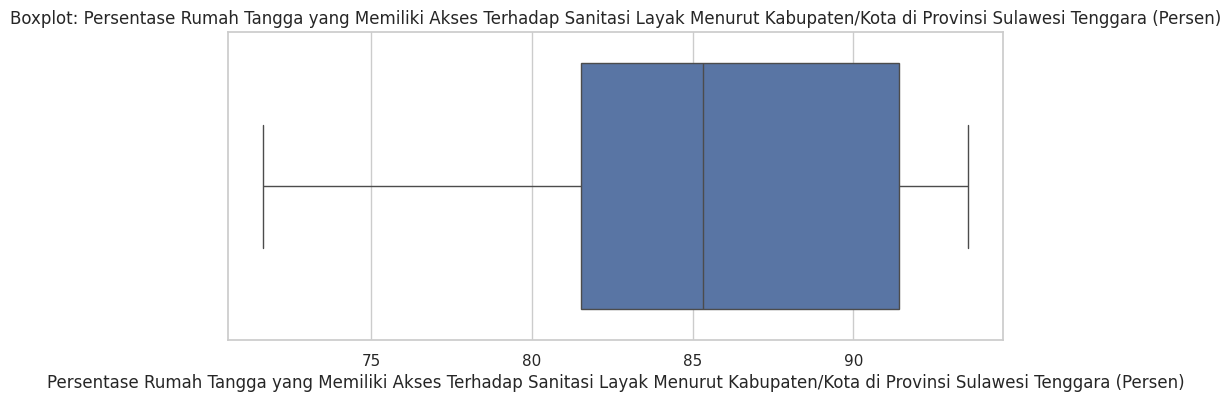

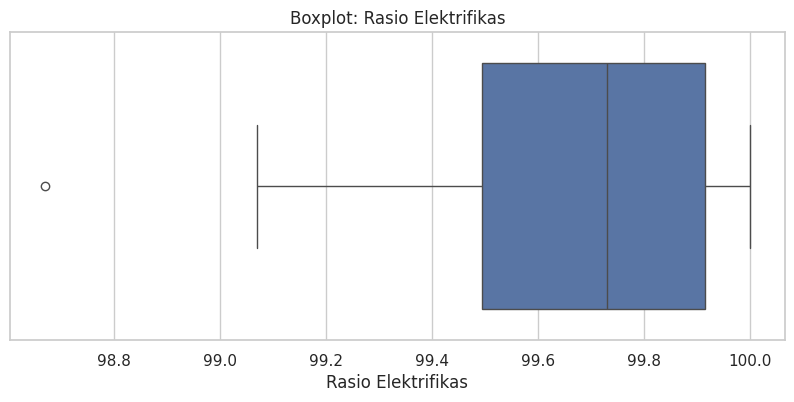

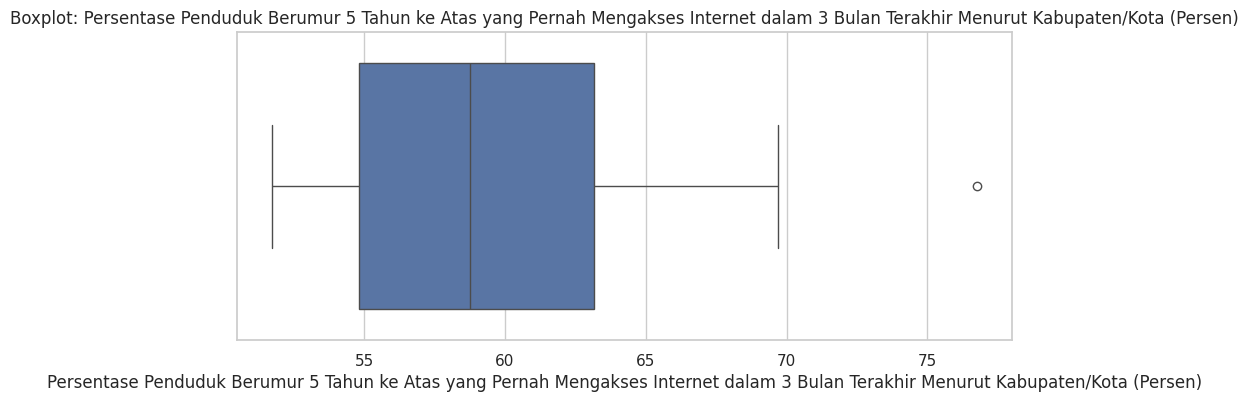

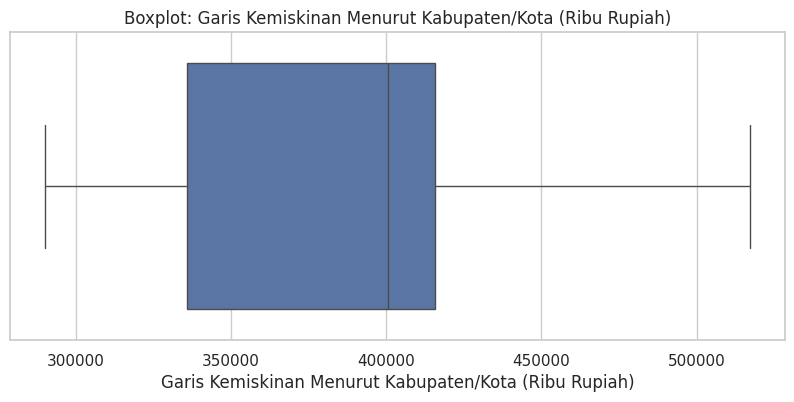

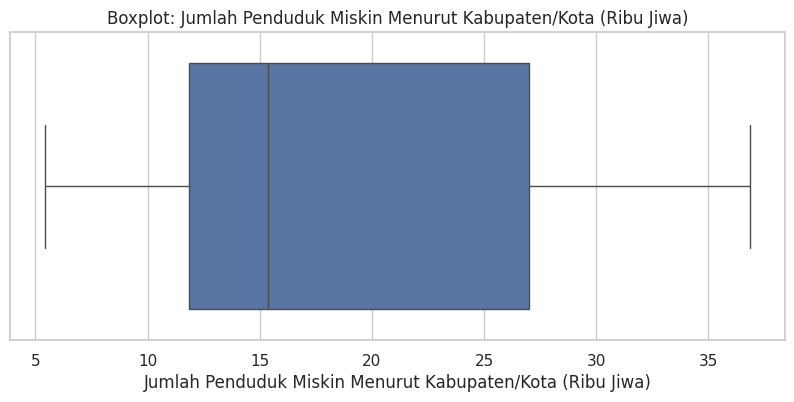

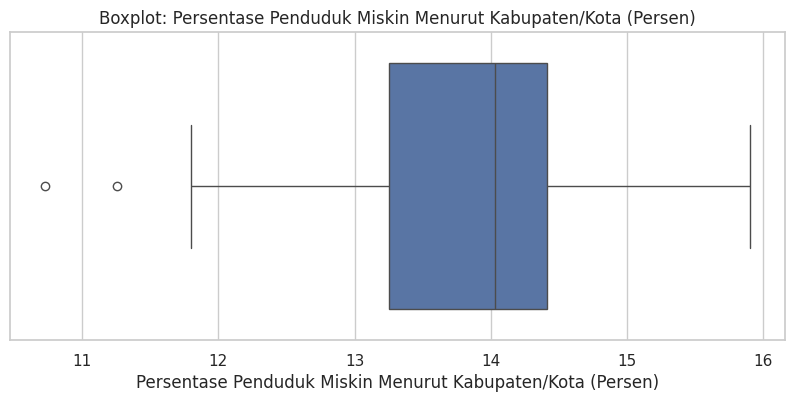

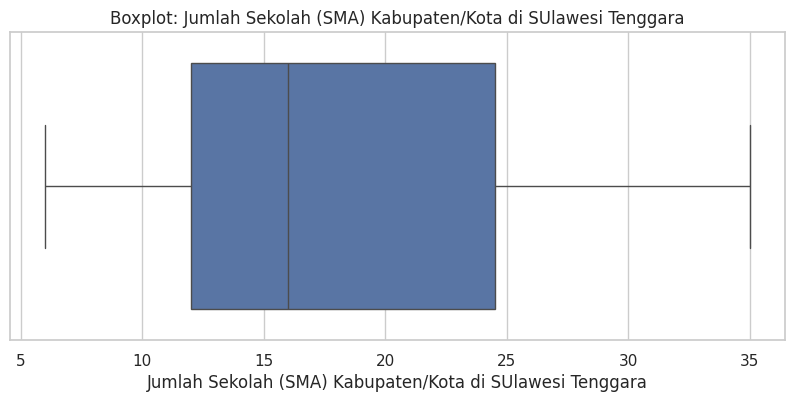

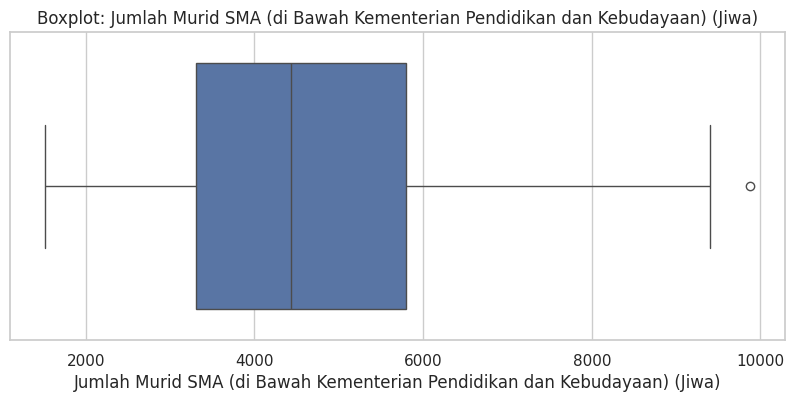

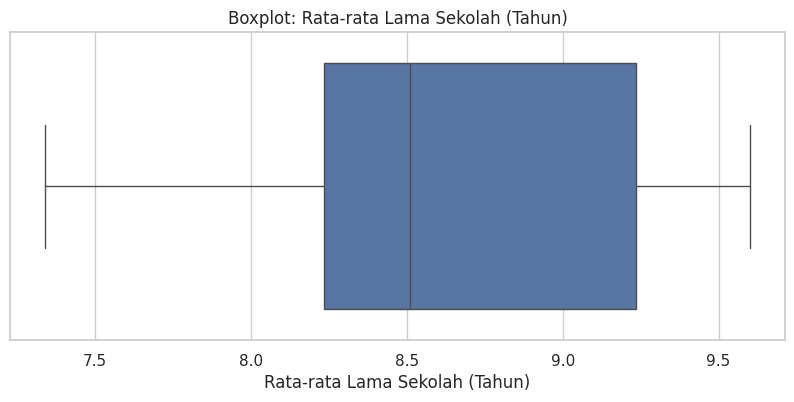

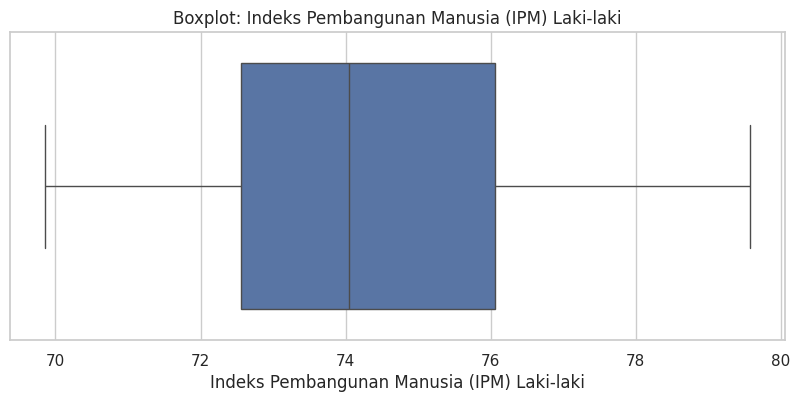

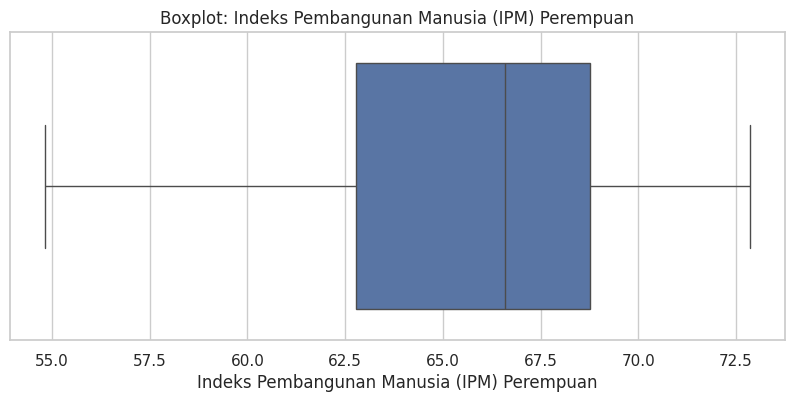

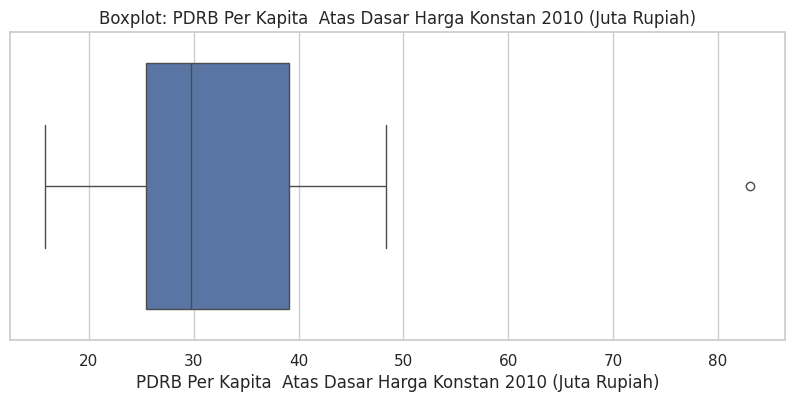

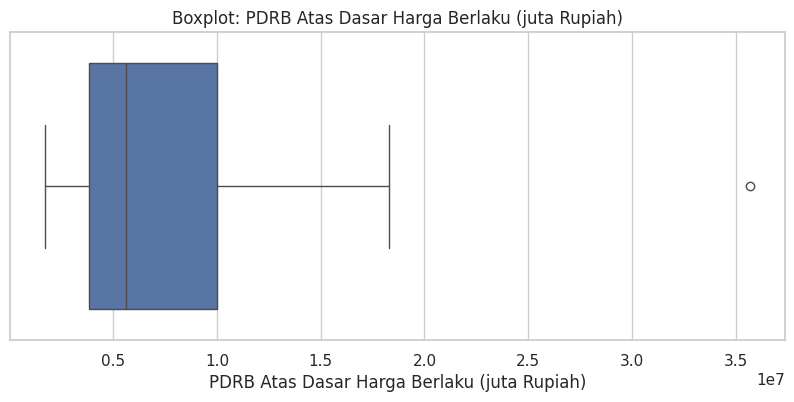

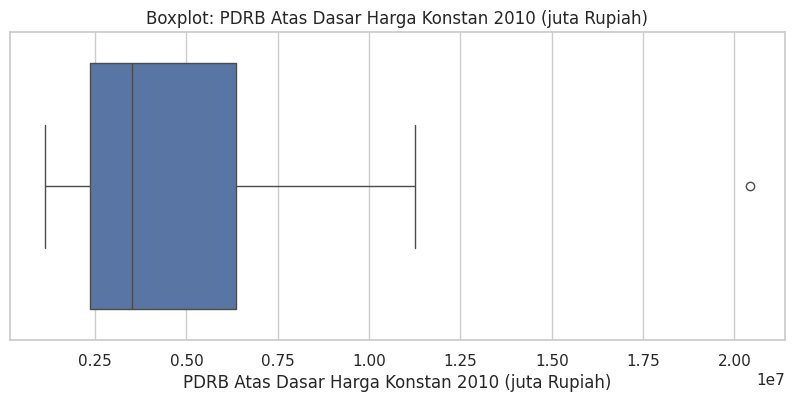

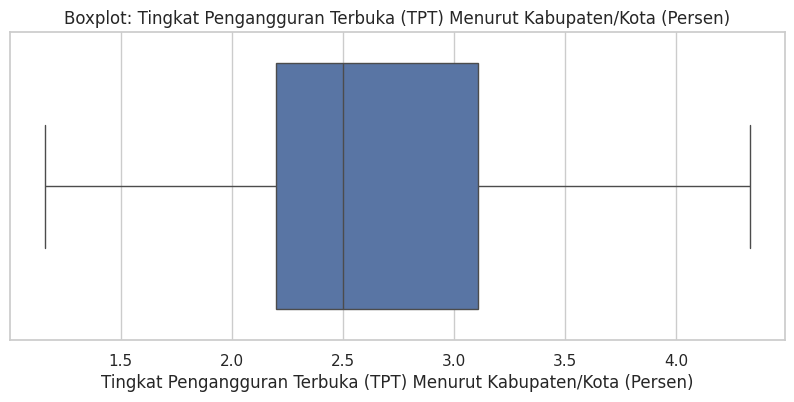

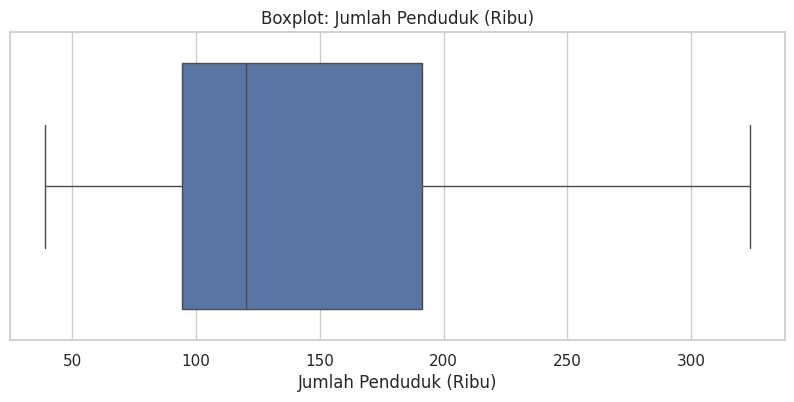

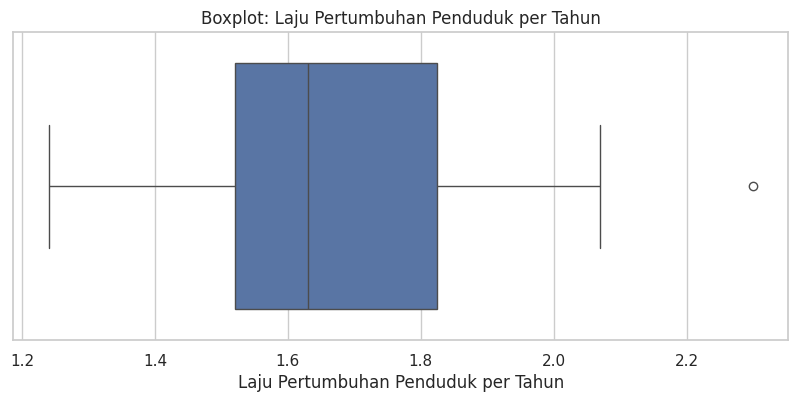

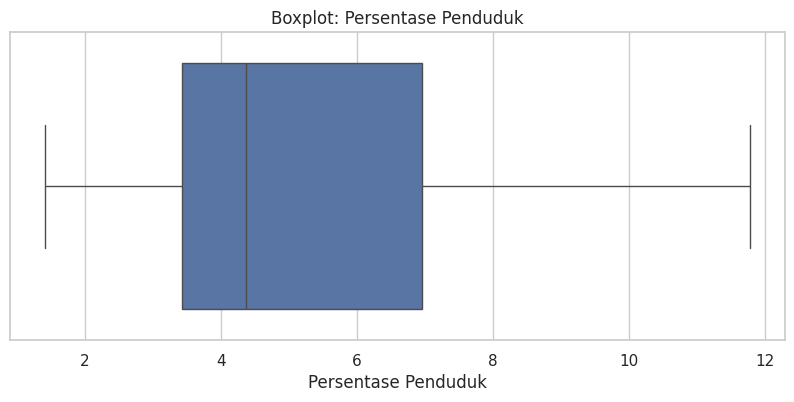

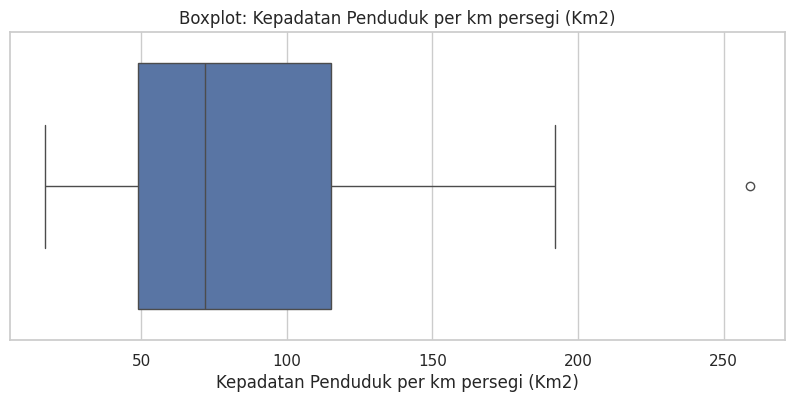

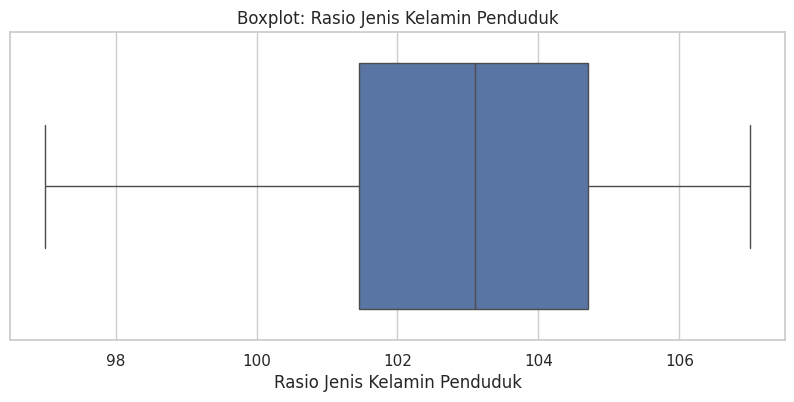

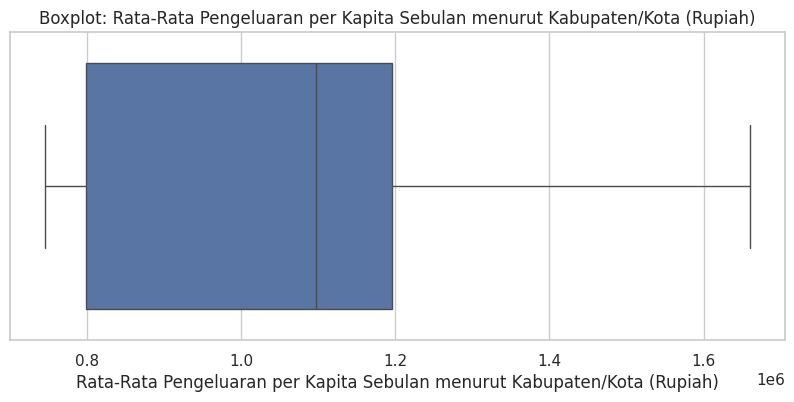

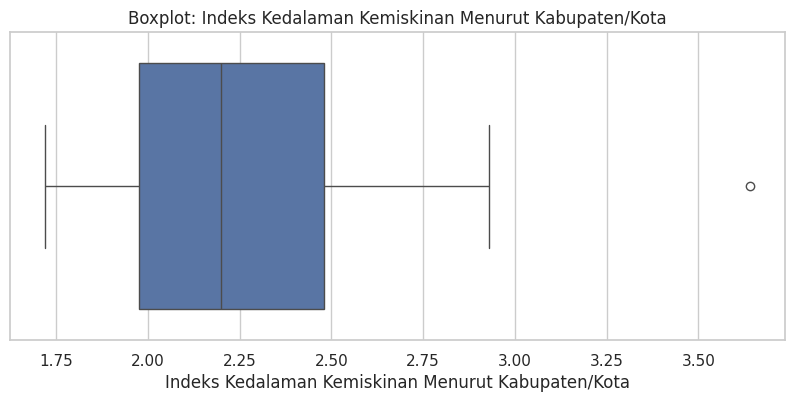

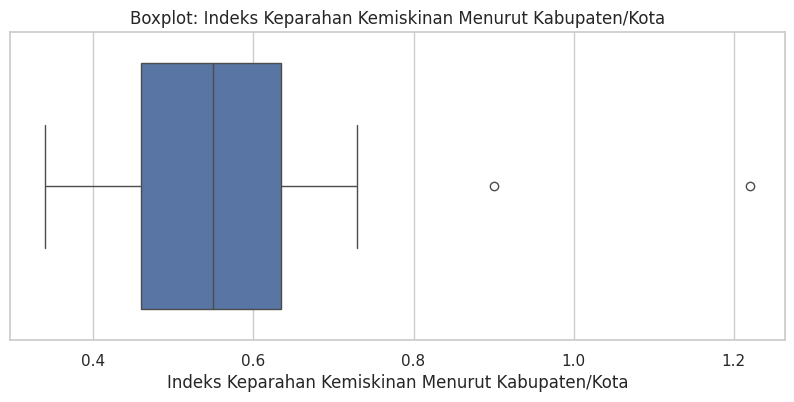

In [ ]:
# **Visualisasi Boxplot untuk Setiap Variabel Numerik**

plt.figure(figsize=(12, 6))
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=combined_df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()


In [ ]:
# **Deteksi Outlier Menggunakan Metode IQR**

outlier_summary = {}

for col in num_cols:
    Q1 = combined_df[col].quantile(0.25)
    Q3 = combined_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = combined_df[(combined_df[col] < lower_bound) | (combined_df[col] > upper_bound)][col]
    outlier_summary[col] = len(outliers)

# Menampilkan jumlah outlier per variabel
print("\n=== Jumlah Outlier per Variabel Numerik ===")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outlier")



=== Jumlah Outlier per Variabel Numerik ===
Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak Menurut Kabupaten/Kota di Provinsi Sulawesi Tenggara (Persen): 0 outlier
Rasio Elektrifikas: 1 outlier
Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah Mengakses Internet dalam 3 Bulan Terakhir Menurut Kabupaten/Kota (Persen): 1 outlier
Garis Kemiskinan Menurut Kabupaten/Kota (Ribu Rupiah): 0 outlier
Jumlah Penduduk Miskin Menurut Kabupaten/Kota (Ribu Jiwa): 0 outlier
Persentase Penduduk Miskin Menurut Kabupaten/Kota (Persen): 2 outlier
Jumlah Sekolah (SMA) Kabupaten/Kota di SUlawesi Tenggara: 0 outlier
Jumlah Murid SMA (di Bawah Kementerian Pendidikan dan Kebudayaan) (Jiwa): 1 outlier
Rata-rata Lama Sekolah (Tahun): 0 outlier
Indeks Pembangunan Manusia (IPM) Laki-laki: 0 outlier
Indeks Pembangunan Manusia (IPM) Perempuan: 0 outlier
PDRB Per Kapita  Atas Dasar Harga Konstan 2010 (Juta Rupiah): 1 outlier
PDRB Atas Dasar Harga Berlaku (juta Rupiah): 1 outlier
PDRB Atas 

In [ ]:
# **Baris yang Mengandung Outlier pada Setiap Variabel**

outlier_rows = {}

for col in num_cols:
    Q1 = combined_df[col].quantile(0.25)
    Q3 = combined_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    rows = combined_df[(combined_df[col] < lower_bound) | (combined_df[col] > upper_bound)]
    if len(rows) > 0:
        outlier_rows[col] = rows[["Kabupaten/Kota", col]]

print("\n=== Detil Outlier Berdasarkan Kabupaten/Kota ===")
for col, rows in outlier_rows.items():
    print(f"\n--- {col} ---")
    display(rows)



=== Detil Outlier Berdasarkan Kabupaten/Kota ===

--- Rasio Elektrifikas ---


,Kabupaten/Kota,Rasio Elektrifikas
7,Kolaka Utara,98.67



--- Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah Mengakses Internet dalam 3 Bulan Terakhir Menurut Kabupaten/Kota (Persen) ---


,Kabupaten/Kota,Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah Mengakses Internet dalam 3 Bulan Terakhir Menurut Kabupaten/Kota (Persen)
7,Kolaka Utara,76.75



--- Persentase Penduduk Miskin Menurut Kabupaten/Kota (Persen) ---


,Kabupaten/Kota,Persentase Penduduk Miskin Menurut Kabupaten/Kota (Persen)
4,Konawe Selatan,11.26
5,Bombana,10.73



--- Jumlah Murid SMA (di Bawah Kementerian Pendidikan dan Kebudayaan) (Jiwa) ---


,Kabupaten/Kota,Jumlah Murid SMA (di Bawah Kementerian Pendidikan dan Kebudayaan) (Jiwa)
4,Konawe Selatan,9874



--- PDRB Per Kapita  Atas Dasar Harga Konstan 2010 (Juta Rupiah) ---


,Kabupaten/Kota,PDRB Per Kapita Atas Dasar Harga Konstan 2010 (Juta Rupiah)
3,Kolaka,83.03



--- PDRB Atas Dasar Harga Berlaku (juta Rupiah) ---


,Kabupaten/Kota,PDRB Atas Dasar Harga Berlaku (juta Rupiah)
3,Kolaka,35684210.97



--- PDRB Atas Dasar Harga Konstan 2010 (juta Rupiah) ---


,Kabupaten/Kota,PDRB Atas Dasar Harga Konstan 2010 (juta Rupiah)
3,Kolaka,20418779.35



--- Laju Pertumbuhan Penduduk per Tahun ---


,Kabupaten/Kota,Laju Pertumbuhan Penduduk per Tahun
9,Konawe Utara,2.3



--- Kepadatan Penduduk per km persegi (Km2) ---


,Kabupaten/Kota,Kepadatan Penduduk per km persegi (Km2)
6,Wakatobi,259



--- Indeks Kedalaman Kemiskinan Menurut Kabupaten/Kota ---


,Kabupaten/Kota,Indeks Kedalaman Kemiskinan Menurut Kabupaten/Kota
6,Wakatobi,3.64



--- Indeks Keparahan Kemiskinan Menurut Kabupaten/Kota ---


,Kabupaten/Kota,Indeks Keparahan Kemiskinan Menurut Kabupaten/Kota
6,Wakatobi,1.22
7,Kolaka Utara,0.90



 **Analisis Penanganan Outlier:**

 Berdasarkan hasil deteksi outlier di atas, ditemukan beberapa nilai ekstrem pada wilayah:

>   * **Kolaka:** Menunjukkan nilai PDRB yang sangat tinggi (ekstrem) karena merupakan wilayah pusat industri/pertambangan.
>   * **Wakatobi:** Menunjukkan kepadatan penduduk dan indeks kemiskinan yang tinggi karena karakteristik wilayah kepulauan kecil.
>   * **Konawe Selatan:** Menunjukkan tingkat kemiskinan terendah sebagai *best practice*.

 **Keputusan:** Data ini dikategorikan sebagai **Natural Outlier** (data valid yang mencerminkan kondisi lapangan yang sebenarnya), bukan *error* input. Oleh karena itu, **tidak dilakukan penghapusan data (*dropping*)**. Data ini justru akan dipertahankan untuk analisis kesenjangan antarwilayah.



# **Cleaning Data**


Pada tahap ini dilakukan beberapa proses:
Pada tahap cleaning ini dilakukan beberapa proses:
1. Menghapus baris agregat provinsi (Sulawesi Tenggara)
2. Menangani missing value (jika ada)
3. Rename kolom agar konsisten dan bebas spasi
4. Mengecek ulang struktur data setelah cleaning



In [ ]:
# ==============================
# 1. Menghapus baris Provinsi
# ==============================

remove_list = ["SULAWESI TENGGARA", "PROVINSI SULAWESI TENGGARA"]

for df in [akses, kemiskinan, pendidikan, ekonomi, demografi, pengeluaran]:
    df.drop(df[df['Kabupaten/Kota'].isin(remove_list)].index, inplace=True)

print("✔ Baris provinsi dihapus di semua dataset.")


✔ Baris provinsi dihapus di semua dataset.


In [ ]:
# ==============================
# 2. Mengisi Missing Value (Jika Ada)
# ==============================

datasets = {
    "akses": akses,
    "kemiskinan": kemiskinan,
    "pendidikan": pendidikan,
    "ekonomi": ekonomi,
    "demografi": demografi,
    "pengeluaran": pengeluaran
}

for name, df in datasets.items():
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['int64', 'float64']:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)

print("✔ Missing value ditangani.")

✔ Missing value ditangani.


In [ ]:
# ==============================
# 3. Rename Kolom Agar Konsisten
# ==============================

# Perbaikan Nama Kabupaten/Kota pada dataset demografi
demografi["Kabupaten/Kota"] = demografi["Kabupaten/Kota"].replace({
    "Kota Kendari": "Kendari",
    "Kota Baubau": "Baubau"
})
# RENAME DICTIONARY — EXACT MATCH 100%
rename_dict = {

    # --- Akses Pelayanan Publik ---
    "Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak Menurut Kabupaten/Kota di Provinsi Sulawesi Tenggara (Persen)": "akses_sanitasi_pct",
    "Rasio Elektrifikas": "rasio_listrik_pct",
    "Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah Mengakses Internet dalam 3 Bulan Terakhir Menurut Kabupaten/Kota (Persen)": "akses_internet_pct",

    # --- Kemiskinan ---
    "Garis Kemiskinan Menurut Kabupaten/Kota (Ribu Rupiah)": "garis_kemiskinan_rp",
    "Jumlah Penduduk Miskin Menurut Kabupaten/Kota (Ribu Jiwa)": "penduduk_miskin_jiwa",
    "Persentase Penduduk Miskin Menurut Kabupaten/Kota (Persen)": "persen_miskin_pct",

    # --- Pendidikan ---
    "Jumlah Sekolah (SMA) Kabupaten/Kota di SUlawesi Tenggara": "sekolah_sma",
    "Jumlah Murid SMA (di Bawah Kementerian Pendidikan dan Kebudayaan) (Jiwa)": "murid_sma_jiwa",
    "Rata-rata Lama Sekolah (Tahun)": "lama_sekolah_th",
    "Indeks Pembangunan Manusia (IPM) Laki-laki": "ipm_l",
    "Indeks Pembangunan Manusia (IPM) Perempuan": "ipm_p",

    # --- Ekonomi ---
    "PDRB Per Kapita  Atas Dasar Harga Konstan 2010 (Juta Rupiah)": "pdrb_perkapita_jt",
    "PDRB Atas Dasar Harga Berlaku (juta Rupiah)": "pdrb_adhb_jt",
    "PDRB Atas Dasar Harga Konstan 2010 (juta Rupiah)": "pdrb_adhk_jt",
    "Tingkat Pengangguran Terbuka (TPT) Menurut Kabupaten/Kota (Persen)": "tpt_pct",

    # --- Demografi ---
    "Jumlah Penduduk (Ribu)": "penduduk_jiwa",
    "Laju Pertumbuhan Penduduk per Tahun": "pertumbuhan_pct",
    "Persentase Penduduk": "persen_penduduk_pct",
    "Kepadatan Penduduk per km persegi (Km2)": "kepadatan_km2",
    "Rasio Jenis Kelamin Penduduk": "rasio_jk",

    # --- Pengeluaran / Ketimpangan ---
    "Rata-Rata Pengeluaran per Kapita Sebulan menurut Kabupaten/Kota (Rupiah)": "pengeluaran_rp",
    "Indeks Kedalaman Kemiskinan Menurut Kabupaten/Kota": "kedalaman_miskin",
    "Indeks Keparahan Kemiskinan Menurut Kabupaten/Kota": "keparahan_miskin"
}

# Terapkan rename ke masing-masing dataframe
for df in [akses, kemiskinan, pendidikan, ekonomi, demografi, pengeluaran]:
    df.rename(columns=rename_dict, inplace=True)

print("✔ Semua kolom berhasil dipersingkat dan unit tetap terjaga.")


✔ Semua kolom berhasil dipersingkat dan unit tetap terjaga.


In [ ]:
print("\n=== Contoh Data Setelah Cleaning ===")
display(akses.head())
print("\n=== Contoh Data Setelah Cleaning ===")
display(pendidikan.head())

display(pengeluaran.head())
display(kemiskinan.head())


=== Contoh Data Setelah Cleaning ===


,Kabupaten/Kota,akses_sanitasi_pct,rasio_listrik_pct,akses_internet_pct
0,Buton,80.33,99.59,55.14
1,Muna,85.31,99.07,54.47
2,Konawe,90.50,99.65,62.38
3,Kolaka,93.56,99.93,66.79
4,Konawe Selatan,92.36,99.90,63.95



=== Contoh Data Setelah Cleaning ===


,Kabupaten/Kota,sekolah_sma,murid_sma_jiwa,lama_sekolah_th,ipm_l,ipm_p
0,Buton,23,5524,8.49,75.99,62.22
1,Muna,35,9402,8.53,75.98,66.84
2,Konawe,28,8891,9.56,77.80,72.85
3,Kolaka,15,6046,9.35,79.57,71.93
4,Konawe Selatan,29,9874,8.51,74.86,66.30


,Kabupaten/Kota,pengeluaran_rp,kedalaman_miskin,keparahan_miskin
0,Buton,793172,1.93,0.37
1,Muna,786420,2.21,0.50
2,Konawe,1264259,2.35,0.60
3,Kolaka,1245515,1.95,0.50
4,Konawe Selatan,1096657,2.20,0.55


,Kabupaten/Kota,garis_kemiskinan_rp,penduduk_miskin_jiwa,persen_miskin_pct
0,Buton,302183,14.15,13.77
1,Muna,419071,32.24,14.07
2,Konawe,400581,33.09,13.02
3,Kolaka,464000,32.96,11.80
4,Konawe Selatan,331620,36.84,11.26


## **Merge Dataset Menjadi Master DataFrame**

Tahap ini menggabungkan seluruh dataset berdasarkan kolom 'Kabupaten/Kota'.
Urutan merge disusun agar lebih mudah ditelusuri.


In [ ]:
master_df = akses.merge(kemiskinan, on="Kabupaten/Kota") \
                 .merge(pendidikan, on="Kabupaten/Kota") \
                 .merge(ekonomi, on="Kabupaten/Kota") \
                 .merge(demografi, on="Kabupaten/Kota") \
                 .merge(pengeluaran, on="Kabupaten/Kota")

print("✔ Merge dataset selesai.")
print("Shape master_df:", master_df.shape)

✔ Merge dataset selesai.
Shape master_df: (17, 24)


In [ ]:
# Tampilkan 5 baris awal
display(master_df.head())

,Kabupaten/Kota,akses_sanitasi_pct,rasio_listrik_pct,akses_internet_pct,garis_kemiskinan_rp,penduduk_miskin_jiwa,persen_miskin_pct,sekolah_sma,murid_sma_jiwa,lama_sekolah_th,...,pdrb_adhk_jt,tpt_pct,penduduk_jiwa,pertumbuhan_pct,persen_penduduk_pct,kepadatan_km2,rasio_jk,pengeluaran_rp,kedalaman_miskin,keparahan_miskin
0,Buton,80.33,99.59,55.14,302183,14.15,13.77,23,5524,8.49,...,3101735.07,2.48,120.2,1.56,4.37,72,102.1,793172,1.93,0.37
1,Muna,85.31,99.07,54.47,419071,32.24,14.07,35,9402,8.53,...,5650868.84,3.27,224.7,1.53,8.17,121,97.0,786420,2.21,0.50
2,Konawe,90.50,99.65,62.38,400581,33.09,13.02,28,8891,9.56,...,11244655.64,3.09,269.5,1.74,9.80,50,107.0,1264259,2.35,0.60
3,Kolaka,93.56,99.93,66.79,464000,32.96,11.80,15,6046,9.35,...,20418779.35,3.36,245.9,1.26,8.95,83,104.3,1245515,1.95,0.50
4,Konawe Selatan,92.36,99.90,63.95,331620,36.84,11.26,29,9874,8.51,...,9630029.61,3.12,323.8,1.77,11.78,76,105.0,1096657,2.20,0.55


# **Cek Missing Value Setelah Merge**



In [ ]:
print("\n=== Missing Value per Kolom Setelah Merge ===")
missing = master_df.isnull().sum()
display(missing)



=== Missing Value per Kolom Setelah Merge ===


,0
Kabupaten/Kota,0
akses_sanitasi_pct,0
rasio_listrik_pct,0
akses_internet_pct,0
garis_kemiskinan_rp,0
penduduk_miskin_jiwa,0
persen_miskin_pct,0
sekolah_sma,0
murid_sma_jiwa,0
lama_sekolah_th,0


## **Cek Duplikasi Data**


In [ ]:
duplicates = master_df.duplicated().sum()
print(f"Jumlah duplikasi baris: {duplicates}")

if duplicates > 0:
    master_df = master_df.drop_duplicates()
    print("✔ Duplikasi baris sudah dihapus.")
else:
    print("✔ Tidak ada duplikasi.")

Jumlah duplikasi baris: 0
✔ Tidak ada duplikasi.


## **Cek Tipe Data Setiap Kolom**

In [ ]:


print("\n=== Info Master Dataset Setelah Cleaning ===")
master_df.info()



=== Info Master Dataset Setelah Cleaning ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Kabupaten/Kota        17 non-null     object 
 1   akses_sanitasi_pct    17 non-null     float64
 2   rasio_listrik_pct     17 non-null     float64
 3   akses_internet_pct    17 non-null     float64
 4   garis_kemiskinan_rp   17 non-null     int64  
 5   penduduk_miskin_jiwa  17 non-null     float64
 6   persen_miskin_pct     17 non-null     float64
 7   sekolah_sma           17 non-null     int64  
 8   murid_sma_jiwa        17 non-null     int64  
 9   lama_sekolah_th       17 non-null     float64
 10  ipm_l                 17 non-null     float64
 11  ipm_p                 17 non-null     float64
 12  pdrb_perkapita_jt     17 non-null     float64
 13  pdrb_adhb_jt          17 non-null     float64
 14  pdrb_adhk_jt          17 non-n

## **Statistik Deskriptif Master Dataset**

In [ ]:
print("\n=== Statistik Deskriptif ===")
display(master_df.describe().T)


=== Statistik Deskriptif ===


,count,mean,std,min,25%,50%,75%,max
akses_sanitasi_pct,17.0,8.584059e+01,7.957126e+00,71.64,82.74,85.49,92.89,96.99
rasio_listrik_pct,17.0,9.966706e+01,3.817847e-01,98.67,99.57,99.74,99.99,100.00
akses_internet_pct,17.0,6.290176e+01,9.528293e+00,51.73,55.14,62.25,66.79,85.61
garis_kemiskinan_rp,17.0,3.994596e+05,7.174334e+04,290203.00,340151.00,403834.00,419071.00,517092.00
penduduk_miskin_jiwa,17.0,1.891588e+01,9.595982e+00,5.44,11.88,15.35,21.79,36.84
persen_miskin_pct,17.0,1.275588e+01,2.910161e+00,4.59,11.80,13.77,14.07,15.90
sekolah_sma,17.0,1.841176e+01,8.411739e+00,6.00,12.00,16.00,26.00,35.00
murid_sma_jiwa,17.0,5.541294e+03,2.910409e+03,1518.00,3315.00,4569.00,6046.00,12115.00
lama_sekolah_th,17.0,8.988235e+00,1.266191e+00,7.34,8.40,8.53,9.45,12.53
ipm_l,17.0,7.572471e+01,4.417055e+00,69.86,72.77,74.86,76.48,87.64


# **Exploratory Data Analysis (EDA)**

### 1. **MENAMPILKAN DISTRIBUSI SETIAP VARIABEL UTAMA**

Tujuan: melihat pola dasar, apakah data miring (skewed), normal, atau ada outlier alami.

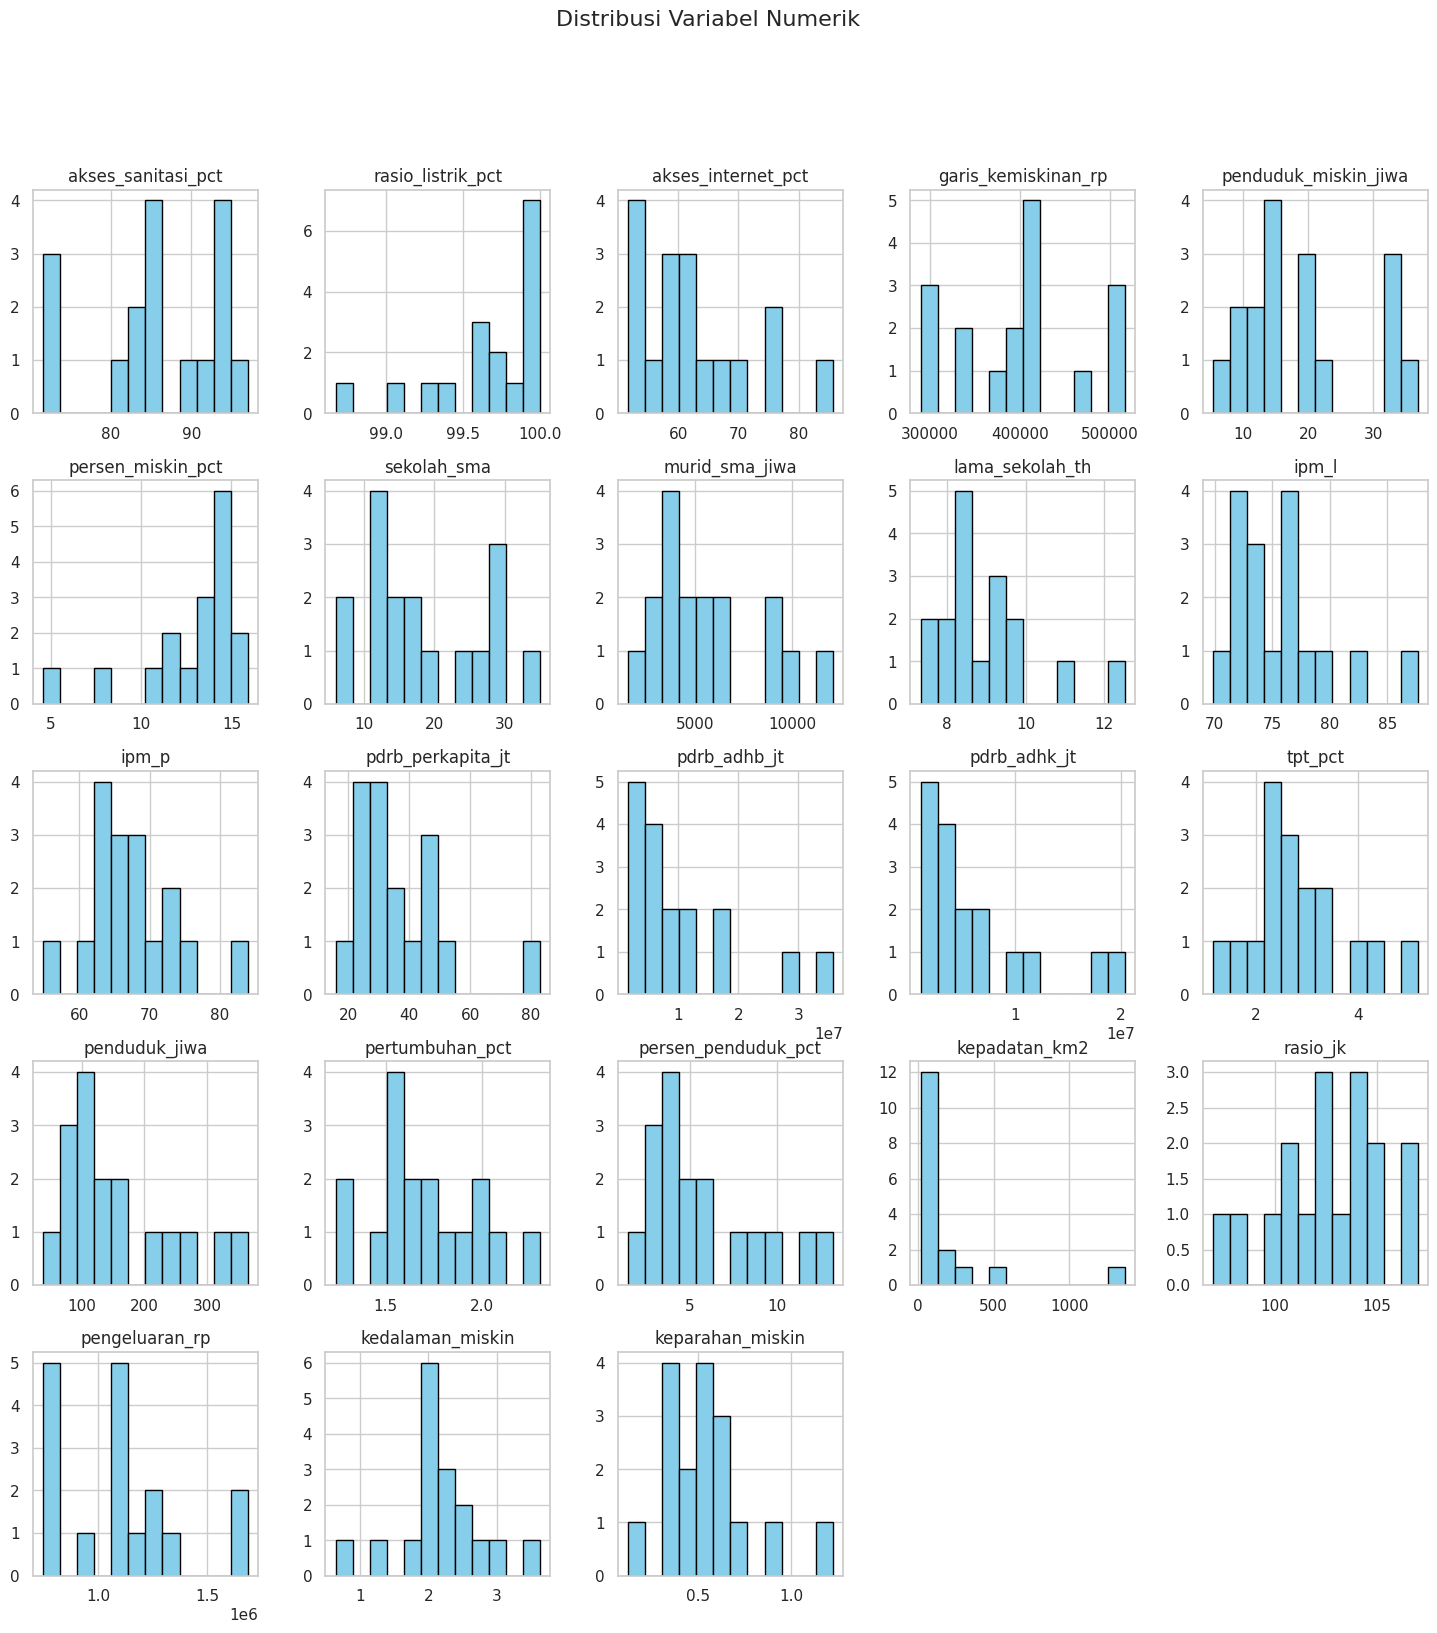

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot distribusi seluruh variabel numerik
master_df.hist(bins=12, figsize=(18, 18), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik", fontsize=16)
plt.show()


### **2. HEATMAP KORELASI ANTAR VARIABEL**

Tujuan: melihat variabel apa yang paling berkaitan dengan ketimpangan, kemiskinan, IPM, ekonomi → sangat relevan untuk SDGs 10.

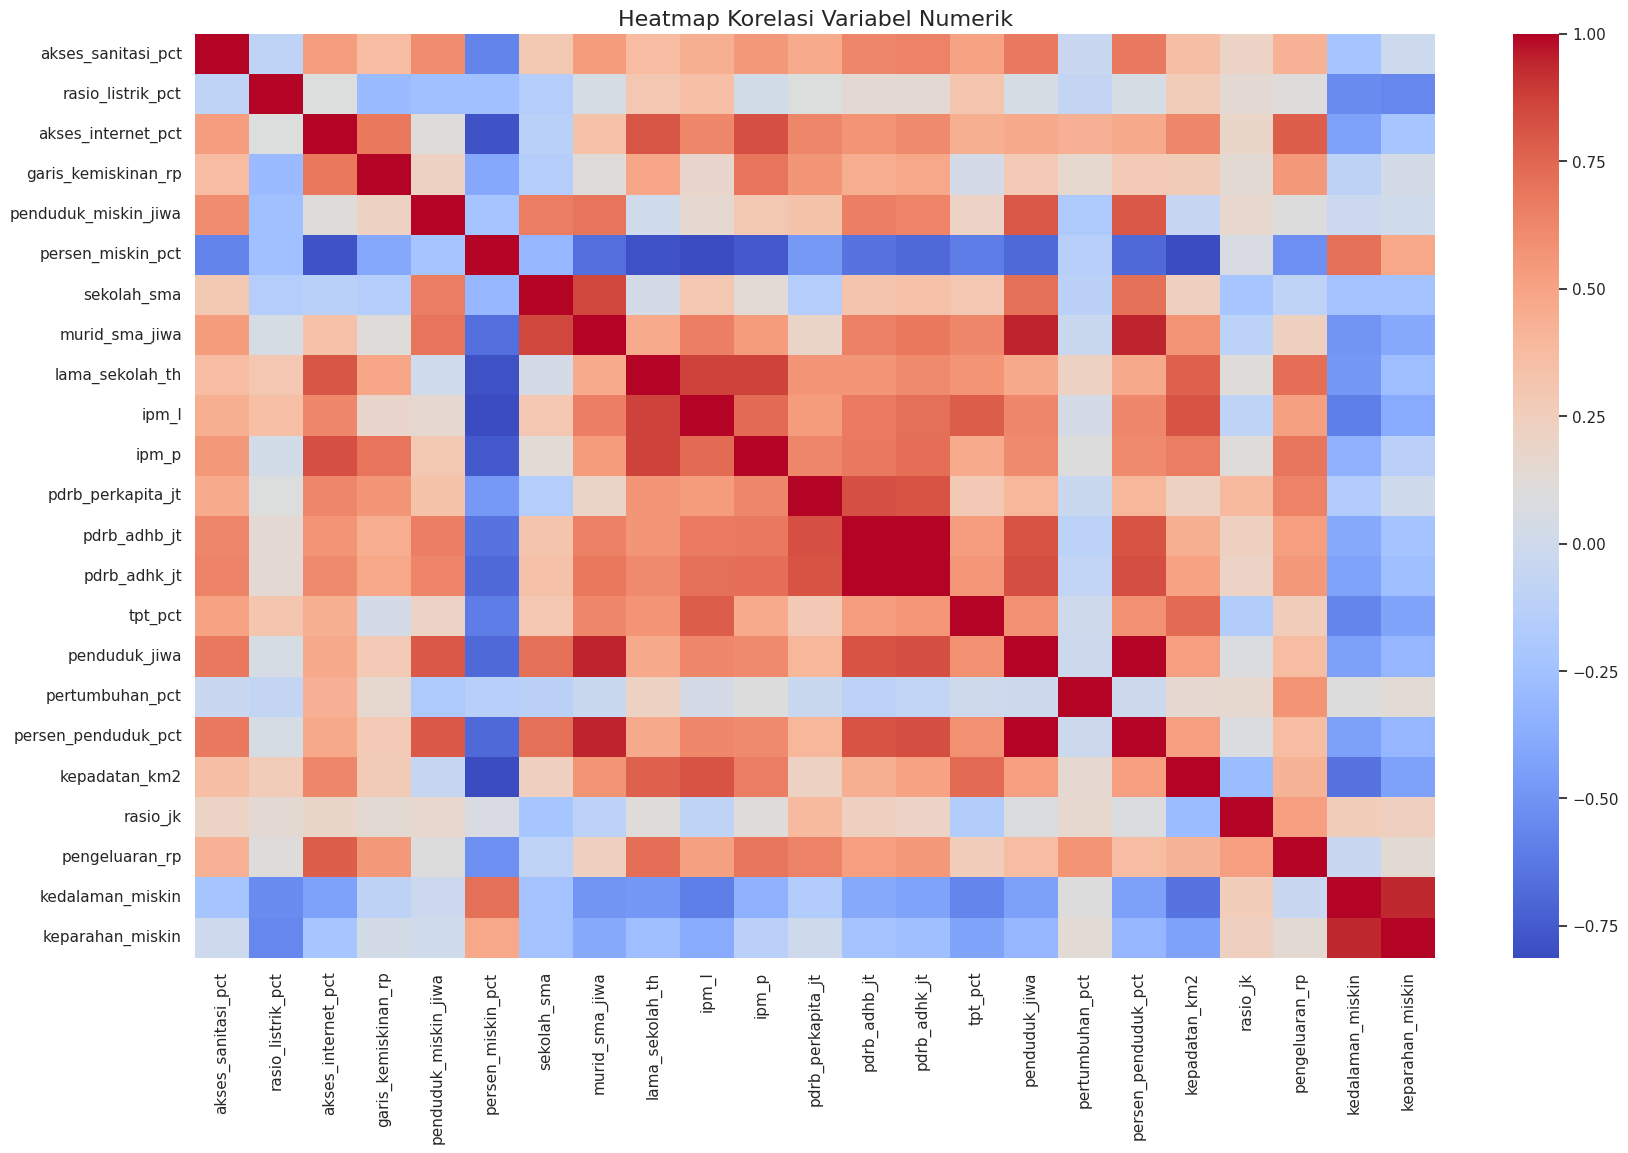

In [ ]:
plt.figure(figsize=(20, 12))
corr = master_df.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Heatmap Korelasi Variabel Numerik", fontsize=16)
plt.show()


### **3. TOP 10 KABUPATEN/KOTA DENGAN KEMISKINAN TERTINGGI**

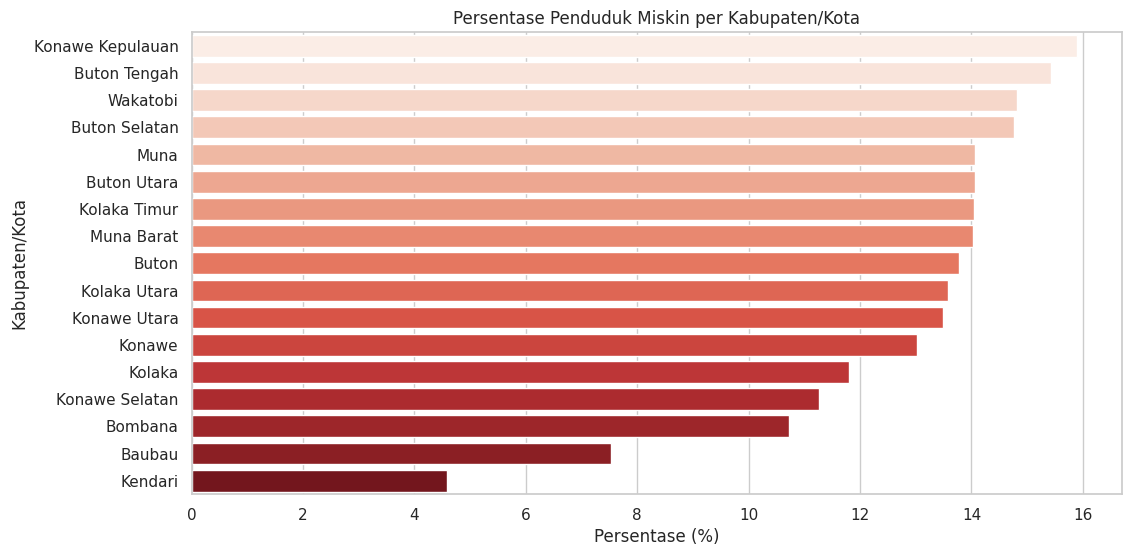

In [ ]:
plt.figure(figsize=(12,6))
top_kemiskinan = master_df.sort_values("persen_miskin_pct", ascending=False)

sns.barplot(
    data=top_kemiskinan,
    x="persen_miskin_pct",
    y="Kabupaten/Kota",
    palette="Reds"
)

plt.title("Persentase Penduduk Miskin per Kabupaten/Kota")
plt.xlabel("Persentase (%)")
plt.ylabel("Kabupaten/Kota")
plt.show()


### **4. RELASI: IPM VS KEMISKINAN**

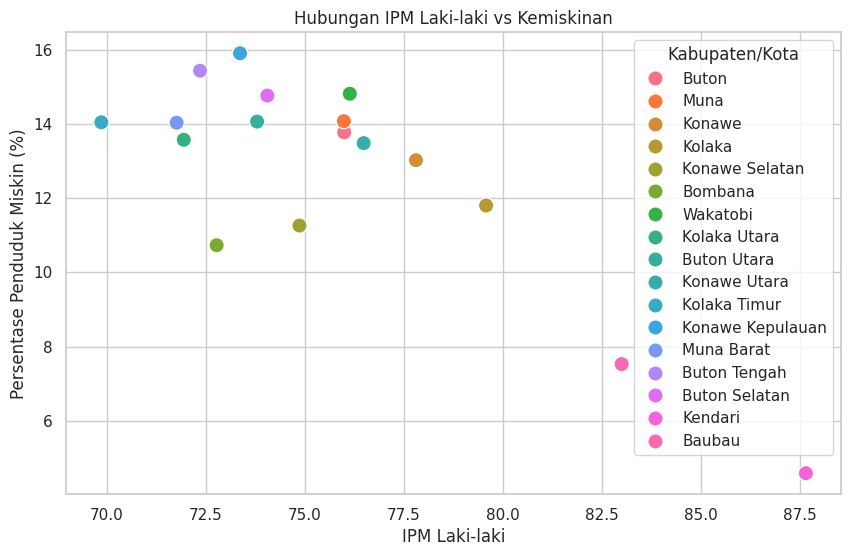

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=master_df,
    x="ipm_l",
    y="persen_miskin_pct",
    hue="Kabupaten/Kota",
    s=120
)
plt.title("Hubungan IPM Laki-laki vs Kemiskinan")
plt.xlabel("IPM Laki-laki")
plt.ylabel("Persentase Penduduk Miskin (%)")
plt.show()


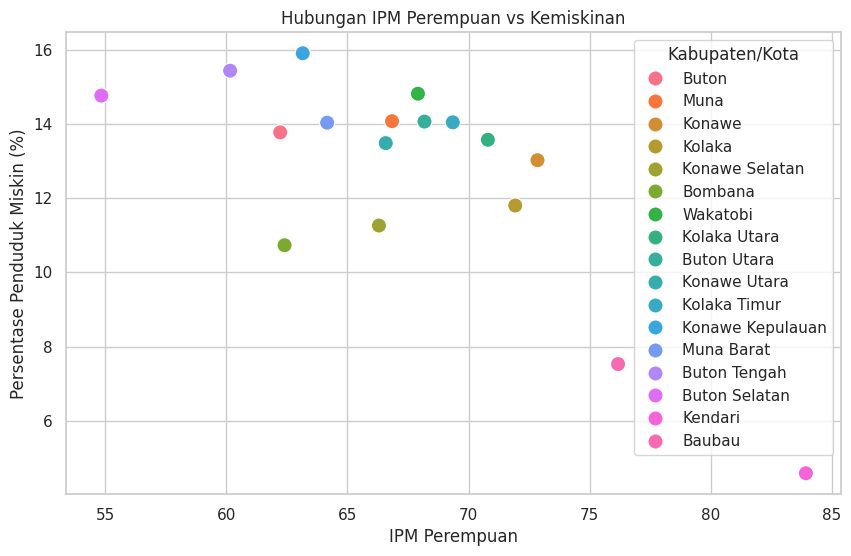

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=master_df,
    x="ipm_p",
    y="persen_miskin_pct",
    hue="Kabupaten/Kota",
    s=120
)
plt.title("Hubungan IPM Perempuan vs Kemiskinan")
plt.xlabel("IPM Perempuan")
plt.ylabel("Persentase Penduduk Miskin (%)")
plt.show()


### **5. RELASI: PDRB PER KAPITA VS KEMISKINAN**

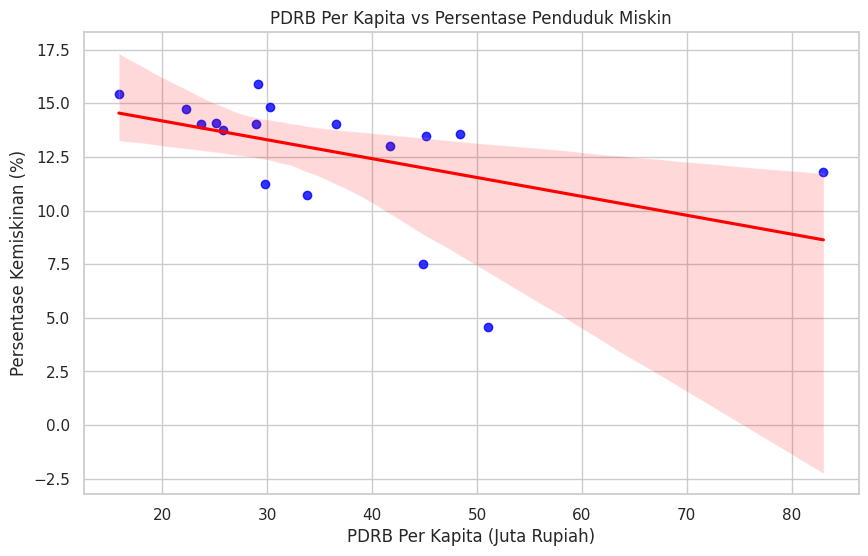

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=master_df,
    x="pdrb_perkapita_jt",
    y="persen_miskin_pct",
    scatter_kws={"color":"blue"},
    line_kws={"color":"red"}
)

plt.title("PDRB Per Kapita vs Persentase Penduduk Miskin")
plt.xlabel("PDRB Per Kapita (Juta Rupiah)")
plt.ylabel("Persentase Kemiskinan (%)")
plt.show()


### **6. RELASI: AKSES SANITASI VS KEMISKINAN**

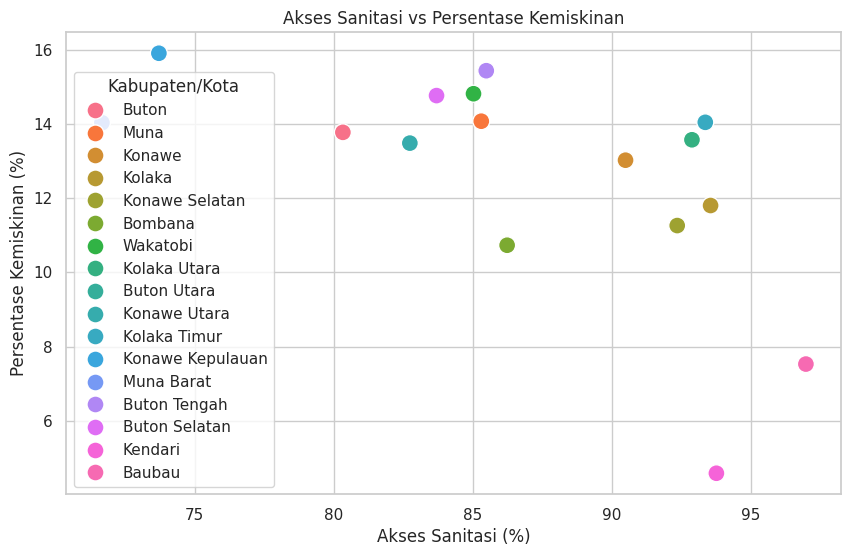

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=master_df,
    x="akses_sanitasi_pct",
    y="persen_miskin_pct",
    hue="Kabupaten/Kota",
    s=150
)

plt.title("Akses Sanitasi vs Persentase Kemiskinan")
plt.xlabel("Akses Sanitasi (%)")
plt.ylabel("Persentase Kemiskinan (%)")
plt.show()


### **7. RANKING KETIMPANGAN: KEDALAMAN & KEPARAHAN KEMISKINAN**

**Indeks Kedalaman Kemiskinan**

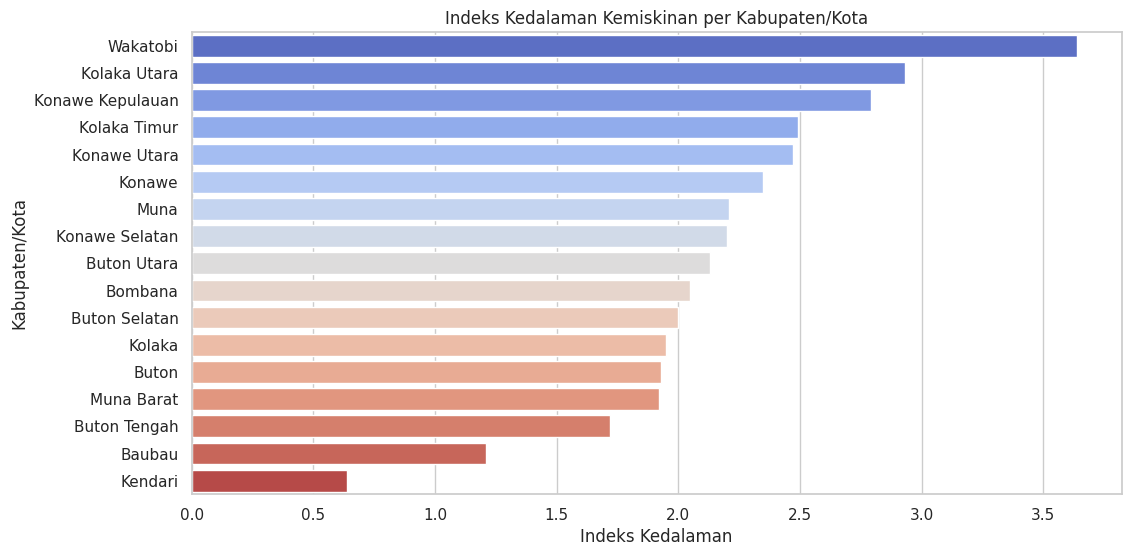

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=master_df.sort_values("kedalaman_miskin", ascending=False),
    x="kedalaman_miskin",
    y="Kabupaten/Kota",
    palette="coolwarm"
)
plt.title("Indeks Kedalaman Kemiskinan per Kabupaten/Kota")
plt.xlabel("Indeks Kedalaman")
plt.ylabel("Kabupaten/Kota")
plt.show()


**Indeks Keparahan Kemiskinan**

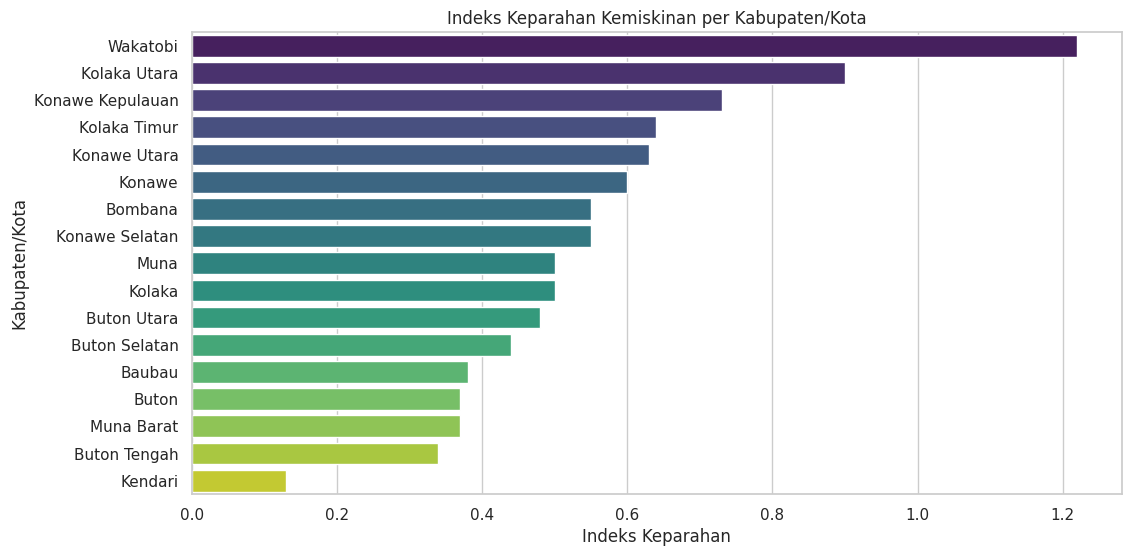

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=master_df.sort_values("keparahan_miskin", ascending=False),
    x="keparahan_miskin",
    y="Kabupaten/Kota",
    palette="viridis"
)
plt.title("Indeks Keparahan Kemiskinan per Kabupaten/Kota")
plt.xlabel("Indeks Keparahan")
plt.ylabel("Kabupaten/Kota")
plt.show()


### **8. PAIRPLOT**

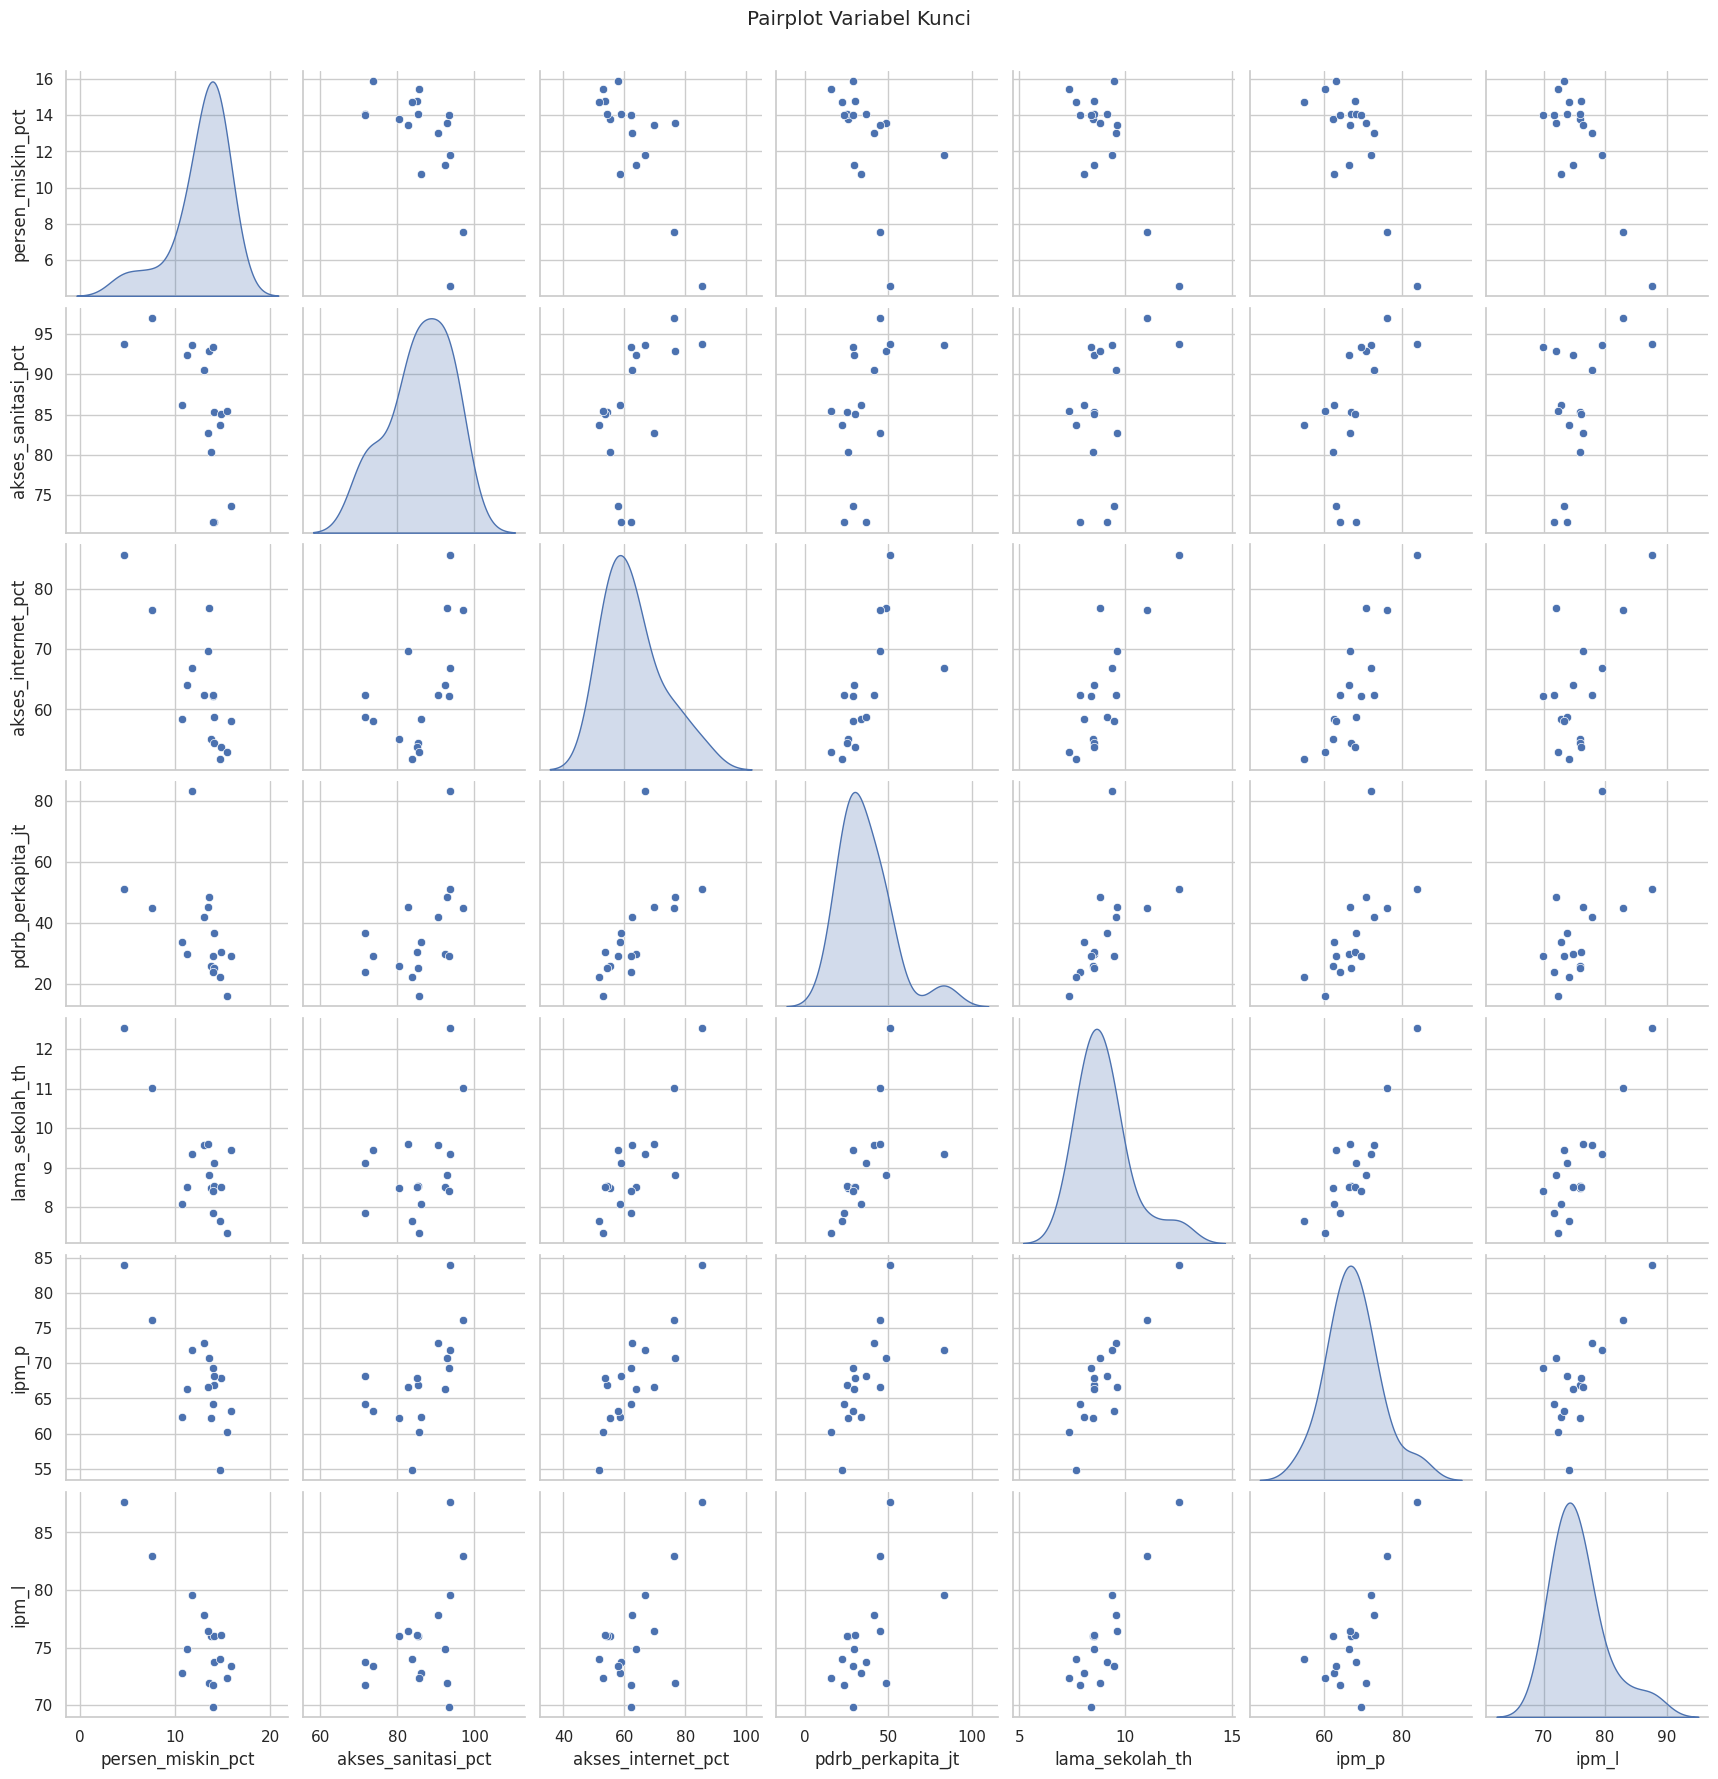

In [ ]:
selected_cols = [
    "persen_miskin_pct",
    "akses_sanitasi_pct",
    "akses_internet_pct",
    "pdrb_perkapita_jt",
    "lama_sekolah_th",
    "ipm_p",
    "ipm_l"
]

sns.pairplot(master_df[selected_cols], diag_kind="kde")
plt.suptitle("Pairplot Variabel Kunci", y=1.02)
plt.show()


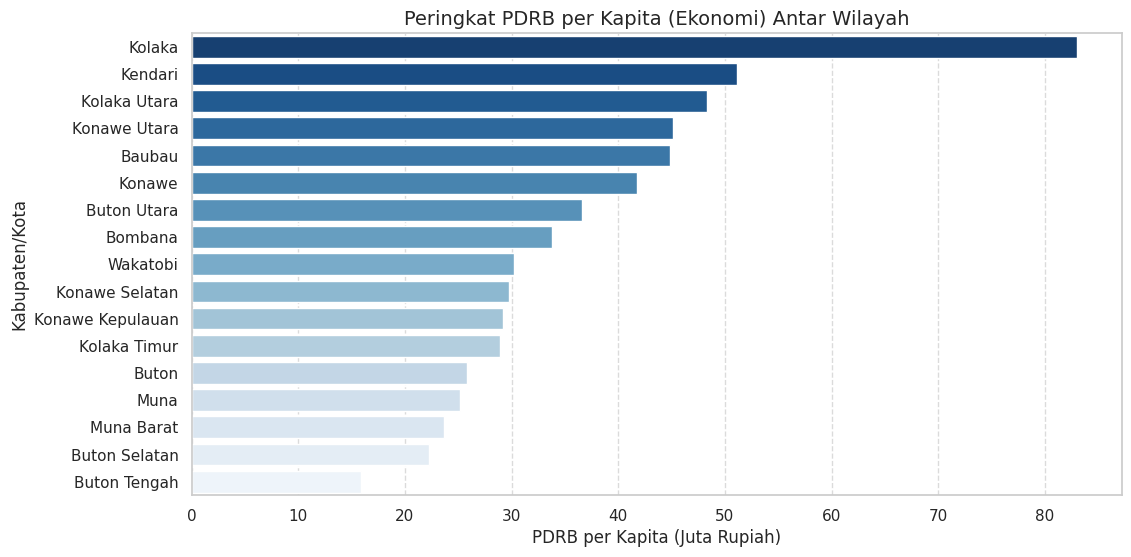

In [ ]:
# --- Visualisasi PDRB per Kapita (Ekonomi) ---
plt.figure(figsize=(12, 6))

# Mengurutkan data dari PDRB tertinggi
df_sorted_pdrb = master_df.sort_values('pdrb_perkapita_jt', ascending=False)

sns.barplot(
    data=df_sorted_pdrb,
    x='pdrb_perkapita_jt',
    y='Kabupaten/Kota',
    palette='Blues_r'  # Warna biru gradasi
)

plt.title('Peringkat PDRB per Kapita (Ekonomi) Antar Wilayah', fontsize=14)
plt.xlabel('PDRB per Kapita (Juta Rupiah)')
plt.ylabel('Kabupaten/Kota')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

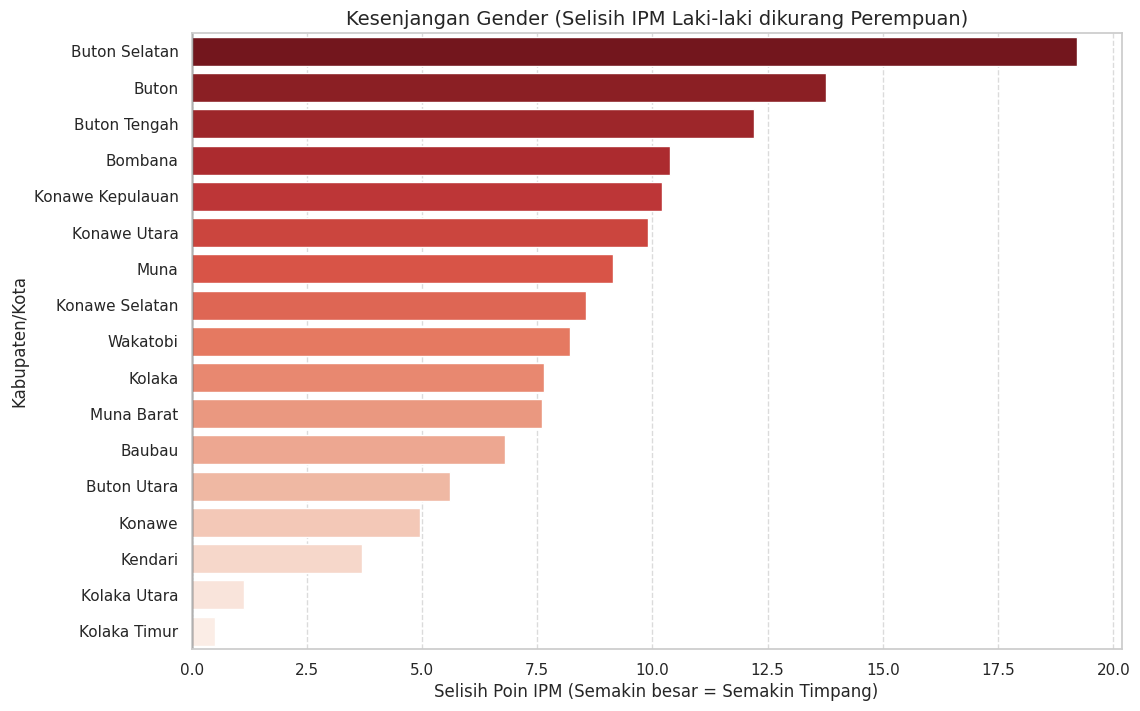

In [ ]:
# --- Visualisasi Gap Gender (IPM Laki-laki vs Perempuan) ---

# 1. Hitung Selisih (Gap)
master_df['gap_ipm'] = master_df['ipm_l'] - master_df['ipm_p']

# 2. Plotting
plt.figure(figsize=(12, 8))

# Mengurutkan berdasarkan gap terbesar (ketimpangan gender tertinggi)
df_sorted_gap = master_df.sort_values('gap_ipm', ascending=False)

sns.barplot(
    data=df_sorted_gap,
    x='gap_ipm',
    y='Kabupaten/Kota',
    palette='Reds_r' # Warna merah untuk menandakan urgensi
)

plt.title('Kesenjangan Gender (Selisih IPM Laki-laki dikurang Perempuan)', fontsize=14)
plt.xlabel('Selisih Poin IPM (Semakin besar = Semakin Timpang)')
plt.ylabel('Kabupaten/Kota')
plt.axvline(x=0, color='black', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# **Analisis Ketimpangan Multidimensional Antar Kabupaten/Kota**

Bagian ini menjawab pertanyaan: *"Bagaimana tingkat ketimpangan pembangunan antar kabupaten/kota di Provinsi Sulawesi Tenggara berdasarkan indikator multidimensional?"*

Analisis dilakukan dengan dua pendekatan visualisasi:
1.  **Heatmap Indikator Kunci:** Memetakan posisi relatif setiap daerah pada dimensi Ekonomi (PDRB), Sosial (IPM), Infrastruktur (Internet), dan Kesejahteraan (Kemiskinan).
2.  **Skor Pembangunan Gabungan (Composite Score):** Meranking daerah berdasarkan rata-rata pencapaian dari keempat dimensi tersebut untuk melihat ketimpangan secara holistik.

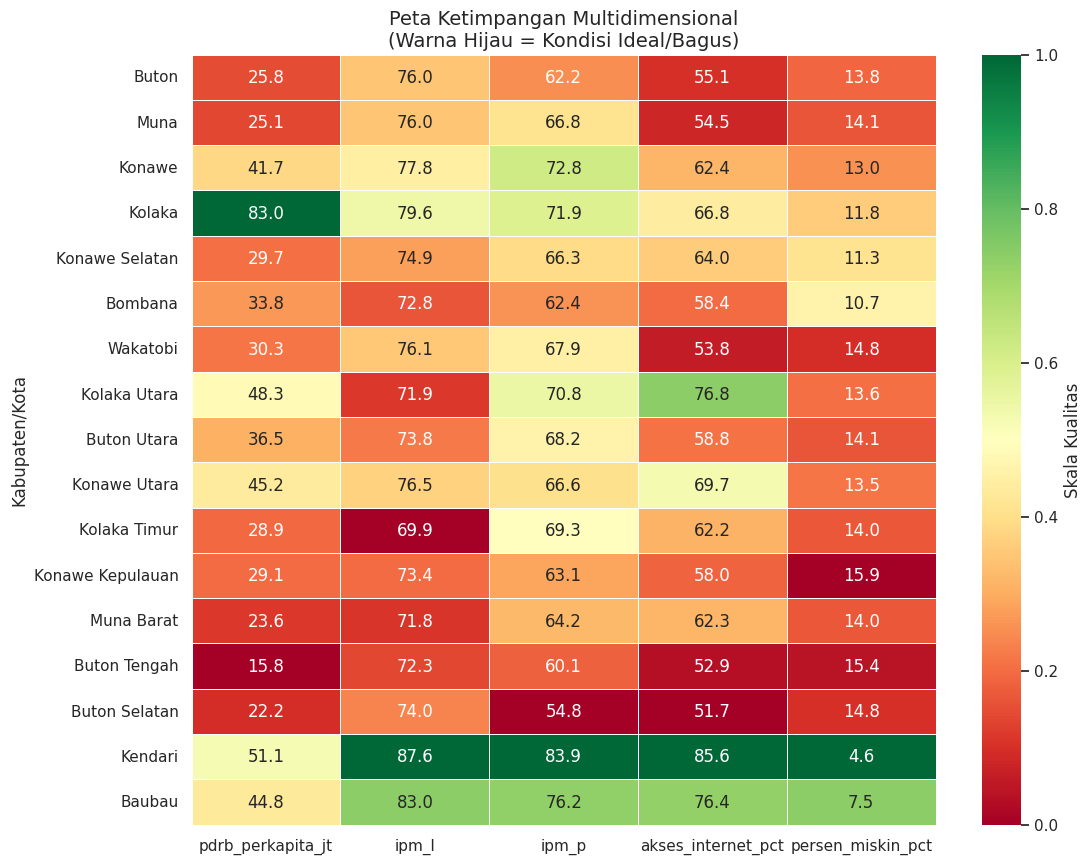

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# --- REVISI OPSI 1: HEATMAP DENGAN IPM LAKI & PEREMPUAN ---

# 1. Masukkan KEDUA kolom ke dalam list dashboard
cols_dashboard = [
    'pdrb_perkapita_jt',
    'ipm_l',                  # Tampilkan Laki-laki
    'ipm_p',                  # Tampilkan Perempuan (Biar kelihatan bedanya)
    'akses_internet_pct',
    'persen_miskin_pct'
]

# 2. Normalisasi
scaler = MinMaxScaler()
df_norm = master_df.copy()
df_norm[cols_dashboard] = scaler.fit_transform(master_df[cols_dashboard])

# Balik logika warna kemiskinan
df_norm['persen_miskin_pct'] = 1 - df_norm['persen_miskin_pct']

# 3. Plotting
plt.figure(figsize=(12, 10)) # Perlebar sedikit kanvasnya
sns.heatmap(
    df_norm.set_index('Kabupaten/Kota')[cols_dashboard],
    annot=master_df.set_index('Kabupaten/Kota')[cols_dashboard],
    fmt=".1f",
    cmap='RdYlGn',
    linewidths=0.5,
    cbar_kws={'label': 'Skala Kualitas'}
)

plt.title('Peta Ketimpangan Multidimensional\n(Warna Hijau = Kondisi Ideal/Bagus)', fontsize=14)
plt.show()

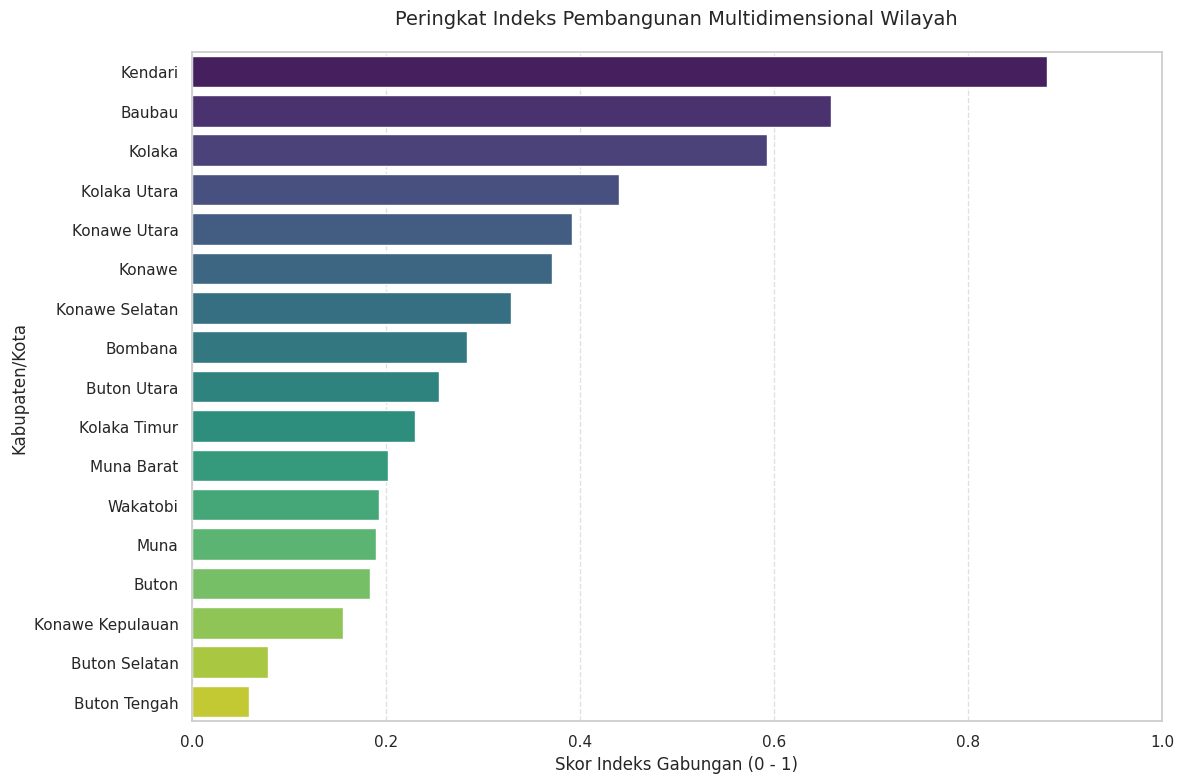

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# --- PERSIPAN DATA (NORMALISASI) ---
# Memilih variabel representatif untuk setiap dimensi pembangunan
cols_dimensi = [
    'pdrb_perkapita_jt',      # Dimensi Ekonomi
    'ipm_l',                  # Dimensi Sosial (Laki-laki)
    'ipm_p',                  # Dimensi Sosial (Perempuan)
    'akses_internet_pct',     # Dimensi Infrastruktur
    'persen_miskin_pct'       # Dimensi Kesejahteraan (Output)
]

# Normalisasi data ke skala 0-1 agar bisa dibandingkan (MinMax Scaling)
scaler = MinMaxScaler()
df_norm = master_df.copy()
df_norm[cols_dimensi] = scaler.fit_transform(master_df[cols_dimensi])

# Membalik logika 'Persentase Penduduk Miskin'
# Awal: Angka Tinggi = Buruk (1). Kita ubah jadi: Angka Tinggi = Bagus/Rendah Miskin (1)
# Tujuannya agar saat di-plot, warna HIJAU berarti POSITIF (Kemiskinan Rendah)
df_norm['persen_miskin_pct'] = 1 - df_norm['persen_miskin_pct']




# --- VISUALISASI 2: GRAFIK SKOR GABUNGAN (COMPOSITE SCORE) ---
# Menghitung Skor Rata-rata dari semua dimensi
# Catatan: Kita gunakan rata-rata IPM L & P agar adil
df_norm['Skor_Akhir'] = (
    df_norm['pdrb_perkapita_jt'] +
    ((df_norm['ipm_l'] + df_norm['ipm_p']) / 2) +
    df_norm['akses_internet_pct'] +
    df_norm['persen_miskin_pct']
) / 4

# Plotting Ranking
plt.figure(figsize=(12, 8))
df_sorted = df_norm.sort_values('Skor_Akhir', ascending=False)

sns.barplot(
    data=df_sorted,
    x='Skor_Akhir',
    y='Kabupaten/Kota',
    palette='viridis'
)

plt.title('Peringkat Indeks Pembangunan Multidimensional Wilayah', fontsize=14, pad=20)
plt.xlabel('Skor Indeks Gabungan (0 - 1)', fontsize=12)
plt.ylabel('Kabupaten/Kota', fontsize=12)
plt.xlim(0, 1) # Batas sumbu x dari 0 sampai 1
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### **Interpretasi Hasil Analisis Ketimpangan Multidimensional**

Berdasarkan visualisasi **Heatmap Indikator Kunci** dan **Peringkat Skor Gabungan** di atas, diperoleh beberapa temuan strategis terkait status SDGs 10 di Sulawesi Tenggara:

1.  **Dominasi Wilayah Administratif "Kota":**
    **Kota Kendari** menempati peringkat pertama dengan skor indeks gabungan tertinggi (±0,88), diikuti oleh **Kota Baubau** (±0,65). Hal ini menunjukkan bahwa pembangunan multidimensi (kombinasi ekonomi, pendidikan, kesehatan, dan infrastruktur) paling matang terjadi di wilayah perkotaan dibandingkan wilayah kabupaten.

2.  **Ketimpangan Struktural Antar-Dimensi (Asimetris):**
    Visualisasi Heatmap memperlihatkan adanya *asimetri pembangunan*. Beberapa wilayah menunjukkan warna yang kontras dalam satu baris.
    * Contohnya, wilayah dengan **PDRB Tinggi** tidak selalu memiliki warna hijau pada indikator **Kemiskinan** atau **IPM**.
    * Ini mengindikasikan bahwa pertumbuhan ekonomi makro belum sepenuhnya terkonversi menjadi kesejahteraan masyarakat (inklusivitas rendah), yang merupakan tantangan utama pencapaian SDGs 10.
3.  **Ketimpangan Wilayah yang Ekstrem (Gap Lebar):**
    Terlihat jurang ketimpangan yang sangat lebar antara wilayah peringkat teratas dan terbawah.
    * **Top Tier:** Kota Kendari (0,88).
    * **Bottom Tier:** Buton Tengah (0,06), Buton Selatan (0,08), dan Konawe Kepulauan (0,16).
    Selisih skor yang drastis ini memperlihatkan bahwa wilayah pemekaran baru dan kepulauan masih sangat tertinggal dalam aspek pembangunan multidimensi dibandingkan wilayah induk atau kota utama.

4.  **Kesenjangan Wilayah Daratan vs. Kepulauan:**
    Terlihat pola pengelompokan di mana kabupaten-kabupaten pemekaran baru atau wilayah kepulauan (seperti **Buton Tengah, Muna Barat, atau Konawe Kepulauan**) cenderung berada di kuadran bawah dengan warna indikator yang lebih merah/kuning. Keterbatasan akses infrastruktur dan skala ekonomi yang kecil menjadi faktor penghambat utama bagi wilayah-wilayah ini untuk mengejar ketertinggalan dari wilayah induk atau wilayah industri.

# **Analisis Pengaruh Akses Layanan Publik terhadap Kesejahteraan**

Bagian ini bertujuan untuk menjawab pertanyaan: *"Bagaimana pengaruh akses layanan publik (listrik, sanitasi, internet) terhadap tingkat kesejahteraan sosial ekonomi?"*

**Metode Analisis:**
1.  **Matriks Korelasi (Heatmap):** Mengukur kekuatan hubungan antara variabel infrastruktur dengan kemiskinan dan IPM.
    * *Nilai mendekati -1:* Hubungan negatif (Infrastruktur naik, Kemiskinan turun).
    * *Nilai mendekati +1:* Hubungan positif (Searah).
2.  **Scatter Plot dengan Garis Regresi:** Memvisualisasikan tren data untuk melihat apakah ada pola linier yang nyata.

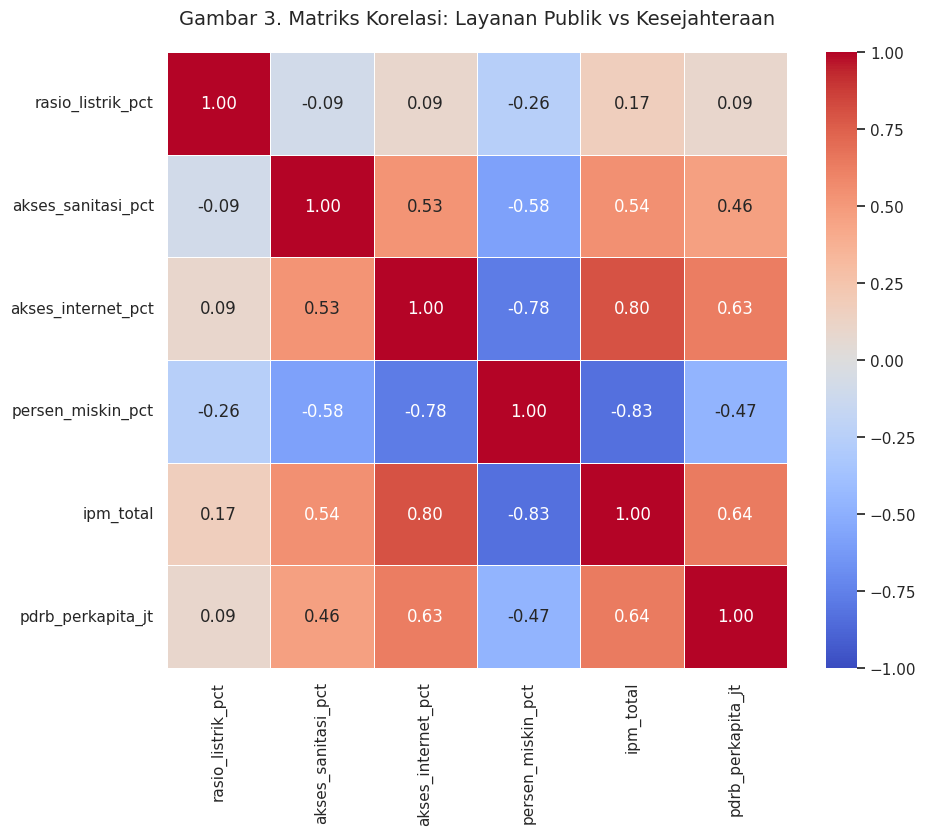

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- LANGKAH 1: MEMBUAT VARIABEL GABUNGAN (IPM TOTAL) ---
# Kita gabungkan IPM Laki-laki dan Perempuan menjadi satu skor rata-rata
# (Memastikan kolom ipm_l dan ipm_p ada)
master_df['ipm_total'] = (master_df['ipm_l'] + master_df['ipm_p']) / 2

# --- PERSIAPAN DATA ---
# Memilih variabel infrastruktur (X) -> NAMA KOLOM SUDAH DIPERBAIKI
cols_infra = ['rasio_listrik_pct', 'akses_sanitasi_pct', 'akses_internet_pct']

# Memilih variabel kesejahteraan (Y)
cols_welfare = ['persen_miskin_pct', 'ipm_total', 'pdrb_perkapita_jt']

# Gabungkan untuk matriks korelasi
cols_analysis = cols_infra + cols_welfare

# --- VISUALISASI 1: MATRIKS KORELASI (DENGAN IPM TOTAL) ---
plt.figure(figsize=(10, 8))
correlation = master_df[cols_analysis].corr()

sns.heatmap(
    correlation,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1, vmax=1,
    linewidths=0.5
)
plt.title('Gambar 3. Matriks Korelasi: Layanan Publik vs Kesejahteraan', fontsize=14, pad=20)
plt.show()



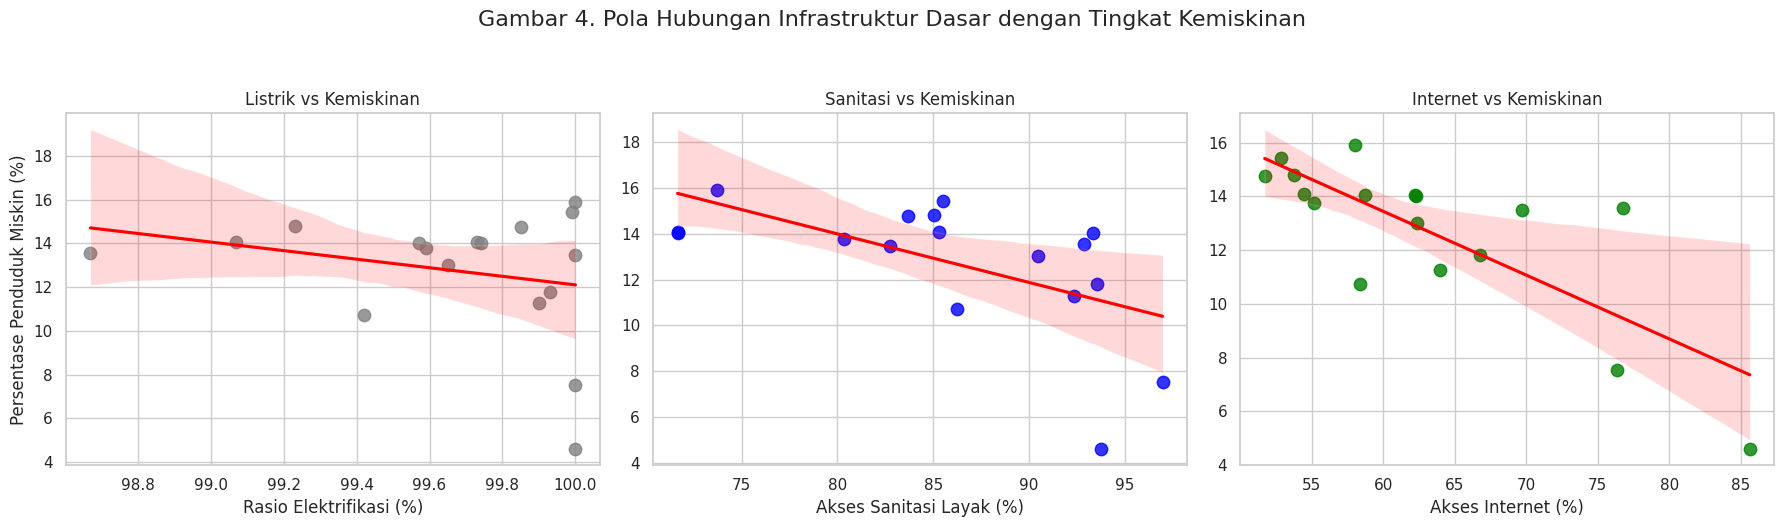

In [ ]:
# --- VISUALISASI 2: SCATTER PLOT ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Listrik vs Kemiskinan (SUDAH DIPERBAIKI: rasio_listrik_pct)
sns.regplot(ax=axes[0], data=master_df, x='rasio_listrik_pct', y='persen_miskin_pct',
            scatter_kws={'color': 'gray', 's':80}, line_kws={'color': 'red'})
axes[0].set_title('Listrik vs Kemiskinan')
axes[0].set_xlabel('Rasio Elektrifikasi (%)')
axes[0].set_ylabel('Persentase Penduduk Miskin (%)')

# Plot 2: Sanitasi vs Kemiskinan
sns.regplot(ax=axes[1], data=master_df, x='akses_sanitasi_pct', y='persen_miskin_pct',
            scatter_kws={'color': 'blue', 's':80}, line_kws={'color': 'red'})
axes[1].set_title('Sanitasi vs Kemiskinan')
axes[1].set_xlabel('Akses Sanitasi Layak (%)')
axes[1].set_ylabel('')

# Plot 3: Internet vs Kemiskinan
sns.regplot(ax=axes[2], data=master_df, x='akses_internet_pct', y='persen_miskin_pct',
            scatter_kws={'color': 'green', 's':80}, line_kws={'color': 'red'})
axes[2].set_title('Internet vs Kemiskinan')
axes[2].set_xlabel('Akses Internet (%)')
axes[2].set_ylabel('')

plt.suptitle('Gambar 4. Pola Hubungan Infrastruktur Dasar dengan Tingkat Kemiskinan', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

### **Interpretasi Hasil Analisis No. 2**

Berdasarkan **Tabel Matriks Korelasi** dan visualisasi data di atas, berikut adalah interpretasi mendalam mengenai hubungan infrastruktur publik dengan tingkat kemiskinan dan pembangunan manusia:

1.  **Akses Internet sebagai Penentu Utama (Game Changer):**
    * **Temuan Statistik:** Variabel Akses Internet memiliki korelasi negatif yang sangat kuat terhadap Persen Miskin sebesar **-0.78**.
    * **Analisis:** Ini adalah angka korelasi tertinggi dibandingkan infrastruktur lain. Artinya, wilayah dengan akses internet yang tinggi secara signifikan memiliki tingkat kemiskinan yang jauh lebih rendah. Internet juga berkorelasi sangat kuat dan positif dengan IPM Total (**0.80**), menandakan bahwa infrastruktur digital berjalan lurus dengan kualitas pendidikan dan ekonomi masyarakat.

2.  **Sanitasi Layak Memiliki Pengaruh Moderat:**
    * **Temuan Statistik:** Akses Sanitasi memiliki korelasi negatif sedang (**-0.58**) terhadap kemiskinan.
    * **Analisis:** Sanitasi yang buruk berhubungan dengan kesehatan yang buruk, yang dapat menjebak masyarakat dalam lingkaran kemiskinan. Meskipun pengaruhnya tidak sekuat internet, perbaikan sanitasi tetap krusial untuk standar hidup dasar.

3.  **Listrik Sudah Jenuh (Saturated) dan Bukan Pembeda Utama:**
    * **Temuan Statistik:** Rasio Listrik memiliki korelasi negatif yang lemah (**-0.26**) terhadap kemiskinan dan bahkan korelasi sangat kecil terhadap PDRB per Kapita (**0.09**).
    * **Analisis:** Lemahnya hubungan ini **bukan** berarti listrik tidak penting, melainkan karena rasio elektrifikasi di hampir seluruh wilayah Sulawesi Tenggara sudah merata (mendekati 100%). Karena semua wilayah (baik miskin maupun kaya) sudah punya listrik, variabel ini tidak lagi menjadi faktor pembeda ketimpangan yang signifikan.

4.  **Kesimpulan Pola Hubungan:**
    Data menunjukkan pergeseran prioritas pembangunan. Infrastruktur fisik dasar (listrik) sudah terpenuhi dengan baik. Tantangan ketimpangan saat ini bergeser ke **Infrastruktur Digital**. Kesenjangan akses internet (*Digital Divide*) adalah faktor nyata yang membedakan wilayah sejahtera dengan wilayah tertinggal.

# **Analisis Hubungan Kemiskinan, Pengeluaran, dan Ekonomi (PDRB)**

Bagian ini menjawab pertanyaan: *"Bagaimana hubungan tingkat kemiskinan, pengeluaran per kapita, dan PDRB per kapita terhadap variasi pembangunan wilayah?"*

**Tujuan Analisis:**
Kita ingin melihat konsistensi ekonomi wilayah:
* Apakah wilayah dengan **PDRB Tinggi** (Kaya Sumber Daya) otomatis penduduknya punya **Pengeluaran Tinggi** (Daya Beli Kuat)?
* Apakah ada wilayah yang "Kaya Daerahnya" (PDRB tinggi) tapi "Miskin Penduduknya" (Pengeluaran rendah)? Ini indikasi ketimpangan distribusi pendapatan.

**Metode Visualisasi:**
Kami menggunakan **Bubble Chart** (Grafik Gelembung) yang menggabungkan 3 dimensi sekaligus:
* **Sumbu X:** PDRB per Kapita (Ekonomi Daerah).
* **Sumbu Y:** Persentase Penduduk Miskin (Kesejahteraan).
* **Ukuran Gelembung (Size):** Rata-rata Pengeluaran per Kapita (Daya Beli Penduduk).

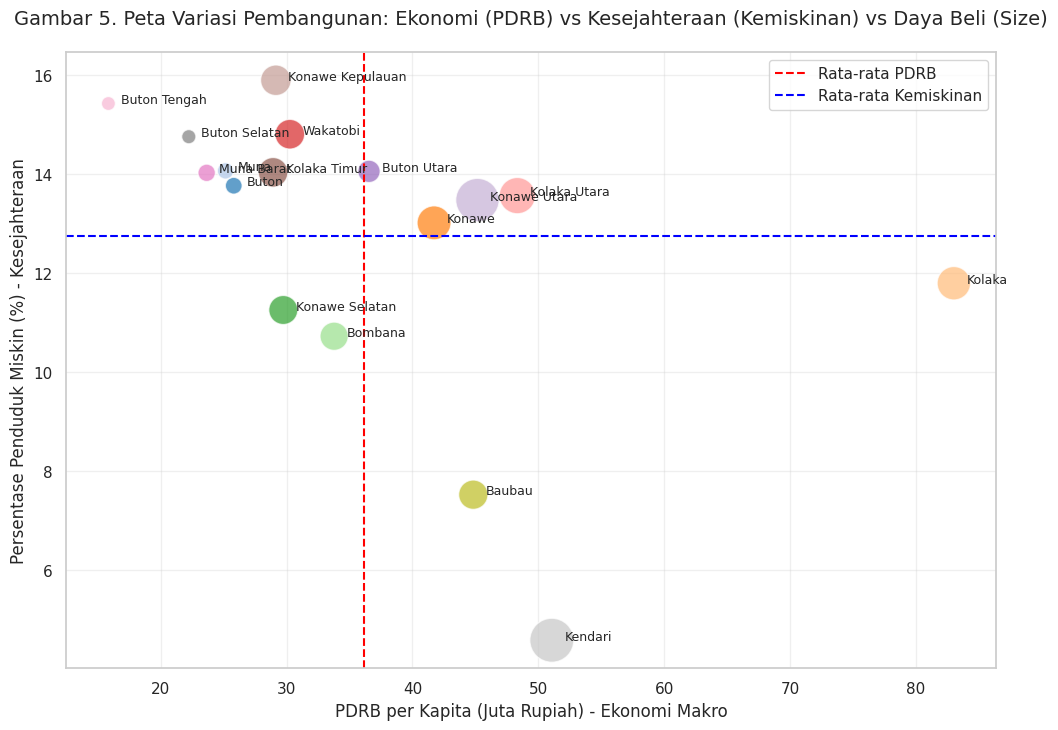

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- VISUALISASI BUBBLE CHART (3 DIMENSI) ---
plt.figure(figsize=(12, 8))

# Membuat Scatter Plot dengan ukuran titik berdasarkan Pengeluaran
# Kita bagi pengeluaran dengan 1000 agar angka di legend tidak terlalu panjang (Ribu Rupiah)
master_df['pengeluaran_ribu'] = master_df['pengeluaran_rp'] / 1000

sns.scatterplot(
    data=master_df,
    x='pdrb_perkapita_jt',
    y='persen_miskin_pct',
    size='pengeluaran_ribu',  # Ukuran gelembung = Daya beli
    sizes=(100, 1000),        # Rentang ukuran gelembung
    hue='Kabupaten/Kota',     # Warna beda tiap kota
    palette='tab20',
    alpha=0.7,
    legend=False              # Matikan legend otomatis yang penuh
)

# Menambahkan Label Nama Kota di sebelah titiknya
for i in range(master_df.shape[0]):
    plt.text(
        master_df.pdrb_perkapita_jt[i]+1, # Geser sedikit ke kanan
        master_df.persen_miskin_pct[i],
        master_df['Kabupaten/Kota'][i],
        fontsize=9
    )

# Menambahkan Garis Rata-rata (Kuadran)
plt.axvline(x=master_df['pdrb_perkapita_jt'].mean(), color='red', linestyle='--', label='Rata-rata PDRB')
plt.axhline(y=master_df['persen_miskin_pct'].mean(), color='blue', linestyle='--', label='Rata-rata Kemiskinan')

plt.title('Gambar 5. Peta Variasi Pembangunan: Ekonomi (PDRB) vs Kesejahteraan (Kemiskinan) vs Daya Beli (Size)', fontsize=14, pad=20)
plt.xlabel('PDRB per Kapita (Juta Rupiah) - Ekonomi Makro', fontsize=12)
plt.ylabel('Persentase Penduduk Miskin (%) - Kesejahteraan', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

### **Interpretasi Hasil Analisis No. 3**

Berdasarkan **Gambar 5 (Bubble Chart Peta Variasi Pembangunan)**, pola hubungan antara Ekonomi (PDRB), Kesejahteraan (Kemiskinan), dan Daya Beli (Pengeluaran) membagi wilayah Sulawesi Tenggara ke dalam 4 tipologi (kuadran) karakteristik:

1.  **Kuadran 1: Wilayah Ideal (PDRB Tinggi, Kemiskinan Rendah, Daya Beli Kuat)**
    * **Wilayah:** **Kota Kendari** dan **Kota Baubau**.
    * **Analisis:** Wilayah ini berada di posisi paling optimal. Tingginya aktivitas ekonomi (PDRB) sejalan dengan tingginya daya beli masyarakat (ditunjukkan oleh ukuran gelembung yang besar) dan rendahnya angka kemiskinan. Ini menandakan pertumbuhan ekonomi yang inklusif dan dirasakan langsung oleh masyarakat.

2.  **Kuadran 2: Paradoks Pertumbuhan (PDRB Tinggi, Kemiskinan Masih di Atas Rata-rata)**
    * **Wilayah:** **Kolaka**, **Konawe**, **Konawe Utara**, dan **Kolaka Utara**.
    * **Analisis:** Ini adalah temuan menarik. Wilayah-wilayah ini memiliki kekayaan sumber daya alam (tambang/industri) yang membuat PDRB-nya tinggi, namun tingkat kemiskinannya masih berada di atas garis rata-rata (garis biru) atau tidak serendah Kota Kendari. Hal ini mengindikasikan adanya **ketimpangan distribusi pendapatan**; kue ekonomi daerah besar, namun belum sepenuhnya menetes (*trickle down*) untuk mendongkrak daya beli masyarakat bawah secara merata.

3.  **Kuadran 3: Wilayah Tertinggal (PDRB Rendah, Kemiskinan Tinggi, Daya Beli Lemah)**
    * **Wilayah:** Didominasi wilayah kepulauan dan pemekaran baru seperti **Buton Tengah, Buton Selatan, Wakatobi, Muna,** dan **Muna Barat**.
    * **Analisis:** Wilayah ini menghadapi tantangan struktural ganda: ekonomi makro belum tumbuh (PDRB rendah) dan daya beli masyarakat sangat lemah (gelembung kecil). Akibatnya, tingkat kemiskinan tetap tinggi. Ini adalah lokus prioritas utama untuk intervensi SDGs.

4.  **Kuadran 4: Efisiensi Sosial (PDRB Rendah, tapi Kemiskinan Rendah)**
    * **Wilayah:** **Konawe Selatan** dan **Bombana**.
    * **Analisis:** Meskipun PDRB per kapitanya tidak setinggi wilayah tambang, kabupaten ini berhasil menekan angka kemiskinan hingga di bawah rata-rata. Ini menunjukkan efisiensi sistem sosial atau sektor pertanian yang kuat menopang kebutuhan dasar warga meskipun ekonomi makronya belum melesat.

**Kesimpulan Utama:**
Besarnya PDRB per kapita **tidak otomatis** menjamin rendahnya kemiskinan. Faktor **Pengeluaran per Kapita (Daya Beli)** terbukti menjadi indikator yang lebih akurat dalam memprediksi tingkat kesejahteraan riil masyarakat dibandingkan sekadar angka pertumbuhan ekonomi makro.

# **Analisis Disparitas Pendidikan dan Kesenjangan Gender**

Bagian ini menjawab pertanyaan: *"Bagaimana disparitas pendidikan (IPM gender dan lama sekolah) mempengaruhi ketimpangan pembangunan?"*

**Metode Visualisasi:**
1.  **Dumbbell Plot (Plot Barbel):** Digunakan untuk memvisualisasikan **Gap Gender**. Titik biru mewakili Laki-laki, titik merah mewakili Perempuan, dan garis di antaranya adalah besaran ketimpangan. Semakin panjang garisnya, semakin tinggi ketimpangan gendernya.
2.  **Bar Chart Rata-rata Lama Sekolah:** Melihat kualitas pendidikan dasar di setiap wilayah.

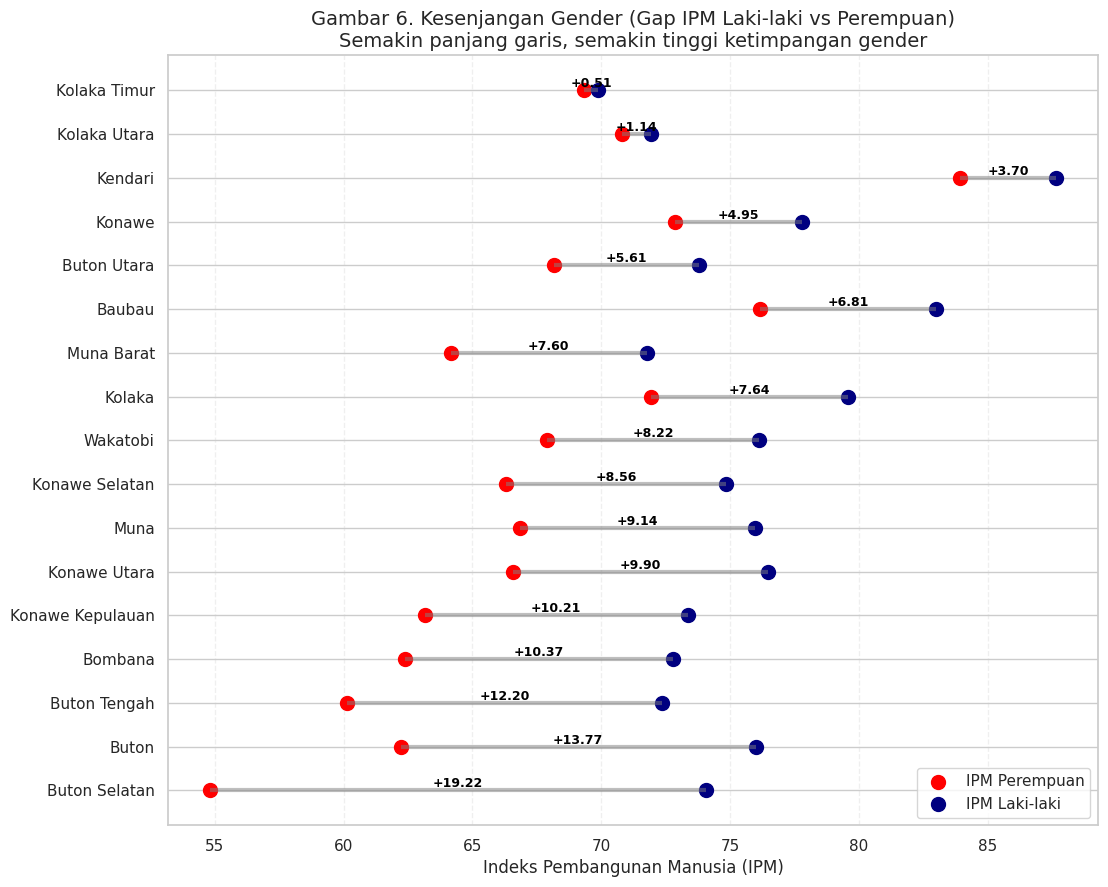

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- PERSIAPAN DATA ---
# 1. Hitung Gap Gender
master_df['gap_gender'] = master_df['ipm_l'] - master_df['ipm_p']

# 2. Hitung Rasio Murid per Sekolah (Khusus Jenjang SMA)
master_df['rasio_murid_sekolah'] = master_df['murid_sma_jiwa'] / master_df['sekolah_sma']

# --- VISUALISASI 1: DUMBBELL PLOT (GAP GENDER) ---
plt.figure(figsize=(12, 10))

# Urutkan data berdasarkan Gap terbesar ke terkecil
df_sorted = master_df.sort_values('gap_gender', ascending=False)

# Buat garis horizontal (pegangan barbel)
plt.hlines(
    y=df_sorted['Kabupaten/Kota'],
    xmin=df_sorted['ipm_p'],
    xmax=df_sorted['ipm_l'],
    color='grey',
    alpha=0.5,
    linewidth=3
)

# Buat titik untuk Perempuan
plt.scatter(
    df_sorted['ipm_p'],
    df_sorted['Kabupaten/Kota'],
    color='red',
    alpha=1,
    s=100,
    label='IPM Perempuan'
)

# Buat titik untuk Laki-laki
plt.scatter(
    df_sorted['ipm_l'],
    df_sorted['Kabupaten/Kota'],
    color='navy',
    alpha=1,
    s=100,
    label='IPM Laki-laki'
)

# Tambahkan label angka Gap
for i in range(len(df_sorted)):
    gap = df_sorted['gap_gender'].iloc[i]
    y_idx = i # Karena kita loop berdasarkan urutan dataframe yang sudah disort
    # Ambil nilai ipm_l dan ipm_p
    val_l = df_sorted['ipm_l'].iloc[i]
    val_p = df_sorted['ipm_p'].iloc[i]

    x_pos = (val_l + val_p) / 2
    plt.text(x_pos, i, f'+{gap:.2f}', color='black', fontsize=9, ha='center', va='bottom', fontweight='bold')

plt.title('Gambar 6. Kesenjangan Gender (Gap IPM Laki-laki vs Perempuan)\nSemakin panjang garis, semakin tinggi ketimpangan gender', fontsize=14)
plt.xlabel('Indeks Pembangunan Manusia (IPM)')
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()



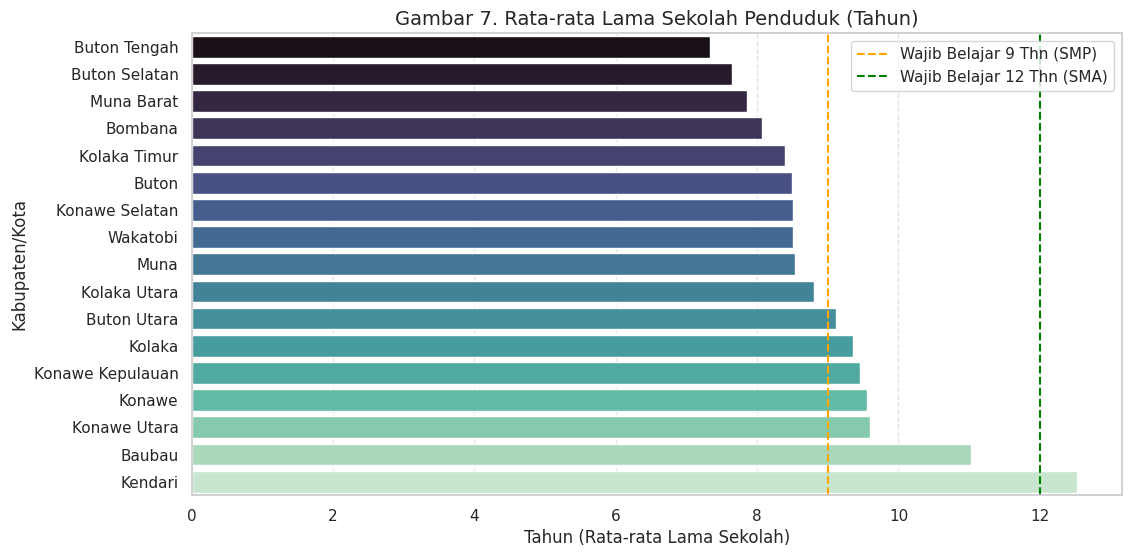

In [ ]:
# --- VISUALISASI 2: RATA-RATA LAMA SEKOLAH ---
plt.figure(figsize=(12, 6))
df_sekolah = master_df.sort_values('lama_sekolah_th', ascending=True)

sns.barplot(
    data=df_sekolah,
    x='lama_sekolah_th',
    y='Kabupaten/Kota',
    palette='mako'  # <--- INI SUDAH DIPERBAIKI (Warna Hijau Laut/Teal)
)

# Tambahkan garis wajib belajar
plt.axvline(x=9, color='orange', linestyle='--', label='Wajib Belajar 9 Thn (SMP)')
plt.axvline(x=12, color='green', linestyle='--', label='Wajib Belajar 12 Thn (SMA)')

plt.title('Gambar 7. Rata-rata Lama Sekolah Penduduk (Tahun)', fontsize=14)
plt.xlabel('Tahun (Rata-rata Lama Sekolah)')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

### **Interpretasi Hasil Analisis No. 4**

Berdasarkan visualisasi **Dumbbell Plot (Gambar 6)** dan **Bar Chart Lama Sekolah (Gambar 7)**, berikut adalah diagnosis mendalam mengenai disparitas modal manusia:

1.  **Kesenjangan Gender Ekstrem di Wilayah Kepulauan:**
    * **Temuan:** Terdapat variasi ketimpangan gender yang sangat mencolok antarwilayah.
        * *Wilayah Inklusif (Gap Kecil):* **Kolaka Timur** (0,5), **Kolaka Utara** (1,1), dan **Kota Kendari** (3,7). Di sini, pembangunan relatif setara bagi laki-laki dan perempuan.
        * *Wilayah Kritis (Gap Besar):* **Buton Selatan** mencatat ketimpangan tertinggi dengan selisih IPM mencapai **~19,2 poin**, diikuti oleh **Buton** (13,8) dan **Buton Tengah** (12,2).
    * **Analisis:** Besarnya *gap* di wilayah Buton Raya ini mengindikasikan adanya hambatan struktural bagi perempuan untuk mengakses pendidikan dan peluang ekonomi yang setara. Ketimpangan gender ini secara signifikan menurunkan skor IPM total wilayah tersebut.

2.  **Krisis Pendidikan Dasar (Belum Tuntas Wajib Belajar 9 Tahun):**
    * **Temuan:** Mayoritas kabupaten pemekaran masih memiliki Rata-rata Lama Sekolah (RLS) di bawah 9 tahun (belum lulus SMP).
        * *Terendah:* **Buton Tengah** (7,6 tahun) dan **Buton Selatan** (7,8 tahun).
        * *Menengah:* **Kolaka** dan **Konawe** sudah melampaui 9 tahun (lulus SMP), namun belum mencapai target 12 tahun (SMA).
    * **Analisis:** Rendahnya lama sekolah di wilayah tertinggal menjadi akar masalah kemiskinan. Tanpa pendidikan dasar yang tuntas, produktivitas tenaga kerja rendah, sehingga sulit keluar dari jerat kemiskinan (sejalan dengan temuan pada analisis No. 2 dan 3).

3.  **Disparitas Kota vs Kabupaten (Urban-Rural Divide):**
    * **Kota Kendari** dan **Baubau** menjadi *outlier* positif. Kendari memiliki RLS tertinggi (12,4 tahun), yang berarti rata-rata penduduknya sudah menamatkan pendidikan tinggi (kuliah tahun pertama) atau minimal lulus SMA.
    * Kesenjangan pendidikan antara Kota Kendari (12,4 tahun) dengan Buton Tengah (7,6 tahun) adalah **4,8 tahun**. Ini adalah disparitas modal manusia yang sangat lebar dalam satu provinsi.

**Kesimpulan:**
Ketimpangan pembangunan di Sulawesi Tenggara bukan hanya soal infrastruktur fisik, tetapi berakar kuat pada **Kualitas Modal Manusia**. Wilayah yang tertinggal (cluster Buton/Kepulauan) menderita beban ganda: pendidikan rata-rata rendah (< SMP) dan ketimpangan gender yang sangat tinggi.

# **Modeling**

Setelah melalui tahap *Exploratory Data Analysis* (EDA) untuk memahami pola distribusi dan korelasi antar variabel, tahap selanjutnya adalah **Modeling**.

Pada tahap ini, kita akan menggunakan pendekatan **Data Science** (khususnya *Unsupervised Machine Learning*) untuk menemukan pola pengelompokan wilayah yang objektif. Metode ini bertujuan untuk memetakan karakteristik unik setiap kabupaten/kota secara otomatis tanpa bias subjektif, sehingga dapat menghasilkan rekomendasi kebijakan yang lebih spesifik dan tepat sasaran.

# **Analisis Klaster Wilayah (Unsupervised Learning)**

Bagian ini bertujuan untuk mengelompokkan kabupaten/kota ke dalam beberapa tipologi pembangunan (misal: Maju, Berkembang, Tertinggal) menggunakan pendekatan berbasis data (*data-driven*).

**Metodologi:**
1.  **Algoritma:** *K-Means Clustering* dengan *Standard Scaler*.
2.  **Fitur:** PDRB per Kapita (Ekonomi), Kemiskinan (Kesejahteraan), IPM Total (Modal Manusia), dan Internet (Infrastruktur). Keempat fitur ini dipilih karena merepresentasikan dimensi utama SDGs 10.
3.  **Penentuan Jumlah Klaster:** Menggunakan *Elbow Method* untuk mencari jumlah kelompok yang paling optimal secara statistik, kemudian disesuaikan dengan konteks kebijakan publik.

*Catatan: Pendekatan ini bertujuan untuk meminimalkan subjektivitas manusia dalam pengelompokan wilayah, meskipun asumsi pemilihan variabel tetap ditentukan oleh peneliti.*

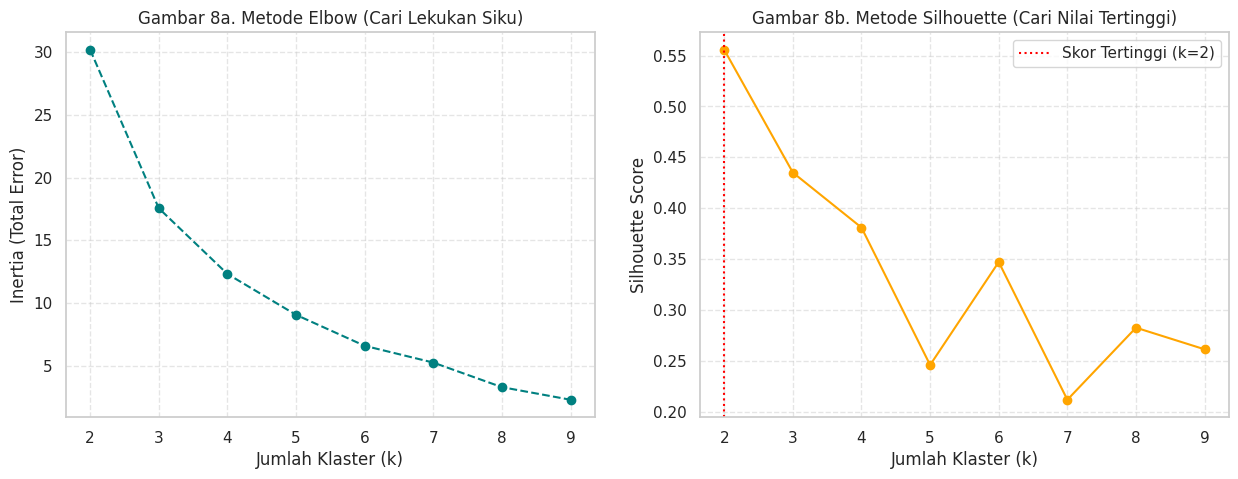

Rekomendasi Statistik berdasarkan Silhouette Score: k = 2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score  # <--- Library baru untuk Silhouette
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- 1. PREPROCESSING ---
features = ['pdrb_perkapita_jt', 'persen_miskin_pct', 'ipm_total', 'akses_internet_pct']
# Pastikan tidak ada missing value agar perhitungan akurat
X = master_df[features].dropna()

# Standarisasi (Wajib untuk K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. MENCARI K OPTIMAL (ELBOW + SILHOUETTE) ---
inertia = []
silhouette_scores = []
range_k = range(2, 10)  # Kita mulai dari 2 karena Silhouette butuh min. 2 klaster

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# --- VISUALISASI VALIDASI (GABUNGAN) ---
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Elbow Method
ax[0].plot(range_k, inertia, marker='o', linestyle='--', color='teal')
ax[0].set_title('Gambar 8a. Metode Elbow (Cari Lekukan Siku)')
ax[0].set_xlabel('Jumlah Klaster (k)')
ax[0].set_ylabel('Inertia (Total Error)')
ax[0].grid(True, linestyle='--', alpha=0.5)

# Plot 2: Silhouette Score Analysis
ax[1].plot(range_k, silhouette_scores, marker='o', linestyle='-', color='orange')
ax[1].set_title('Gambar 8b. Metode Silhouette (Cari Nilai Tertinggi)')
ax[1].set_xlabel('Jumlah Klaster (k)')
ax[1].set_ylabel('Silhouette Score')
ax[1].grid(True, linestyle='--', alpha=0.5)

# Tandai nilai tertinggi otomatis
best_k_sil = range_k[np.argmax(silhouette_scores)]
ax[1].axvline(x=best_k_sil, color='red', linestyle=':', label=f'Skor Tertinggi (k={best_k_sil})')
ax[1].legend()

plt.show()

print(f"Rekomendasi Statistik berdasarkan Silhouette Score: k = {best_k_sil}")

### **Interpretasi Validasi Klaster (Evaluasi Metode Elbow & Silhouette)**

Untuk menentukan jumlah klaster ($k$) yang paling optimal, dilakukan perbandingan antara metode *Elbow* dan *Silhouette Score* (Lihat Gambar 8a dan 8b):

1.  **Analisis Statistik:**
    * **Metode Silhouette (Garis Oranye):** Menunjukkan nilai tertinggi pada **$k=2$**. Secara matematis murni, data ini terpisah paling tegas jika hanya dibagi menjadi dua kelompok (misal: Kelompok Atas vs Bawah).
    * **Metode Elbow (Garis Teal):** Menunjukkan penurunan *inertia* (total error) yang tajam dari $k=2$ ke $k=3$, dan mulai melandai secara signifikan setelah **$k=3$**.

2.  **Keputusan Pemilihan Jumlah Klaster ($k=3$):**
    Meskipun *Silhouette Score* tertinggi ada di angka 2, penelitian ini memutuskan untuk menggunakan **$k=3$**.
    * **Justifikasi Kebijakan (*Domain Knowledge*):** Pembagian menjadi 2 klaster dinilai terlalu umum (*over-simplified*) untuk konteks SDGs.
    * **Urgensi Karakteristik Wilayah:** Jika menggunakan $k=2$, wilayah dengan karakteristik unik "Kaya SDA tapi Kemiskinan Sedang" (seperti wilayah tambang) akan melebur dan kehilangan identitasnya.
    * Dengan menggunakan **$k=3$**, kita dapat memetakan tipologi pembangunan yang lebih spesifik dan *actionable* bagi pemerintah daerah, yaitu:
        1.  **Wilayah Maju (Kota/Jasa)**
        2.  **Wilayah Berkembang/Transisi (Industri/SDA)**
        3.  **Wilayah Tertinggal (Kepulauan/Agraris)**

**Kesimpulan:** Berdasarkan pertimbangan keseimbangan antara statistik dan interpretasi kebijakan, ditetapkan jumlah klaster sebanyak **3 (Tiga)**.

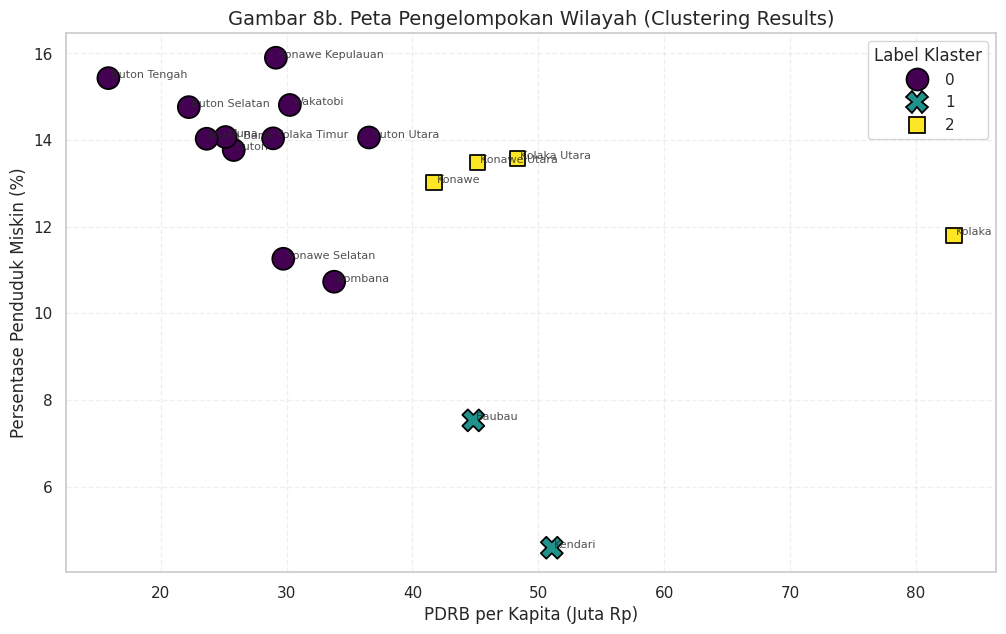

In [ ]:
# --- 3. FINAL MODELING (K=3) ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
master_df['Cluster'] = kmeans.fit_predict(X_scaled)

# --- 4. PROFILING KLASTER ---
# Melihat karakteristik rata-rata tiap kelompok
cluster_profile = master_df.groupby('Cluster')[features].mean().reset_index()

# --- 5. VISUALISASI HASIL (SCATTER PLOT) ---
plt.figure(figsize=(12, 7))

# Scatter Plot 2 Dimensi Utama: Ekonomi vs Kemiskinan
sns.scatterplot(
    data=master_df,
    x='pdrb_perkapita_jt',
    y='persen_miskin_pct',
    hue='Cluster',
    palette='viridis',
    s=250,              # Ukuran titik diperbesar
    style='Cluster',    # Bentuk titik berbeda
    edgecolor='black'
)

# Label Nama Kota (Agar tidak tumpang tindih, kita pakai loop sederhana)
for i in range(master_df.shape[0]):
    plt.text(
        master_df.pdrb_perkapita_jt[i]+0.2, # Geser dikit ke kanan
        master_df.persen_miskin_pct[i],
        master_df['Kabupaten/Kota'][i],
        fontsize=8,
        alpha=0.8
    )

plt.title('Gambar 8b. Peta Pengelompokan Wilayah (Clustering Results)', fontsize=14)
plt.xlabel('PDRB per Kapita (Juta Rp)')
plt.ylabel('Persentase Penduduk Miskin (%)')
plt.legend(title='Label Klaster', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()



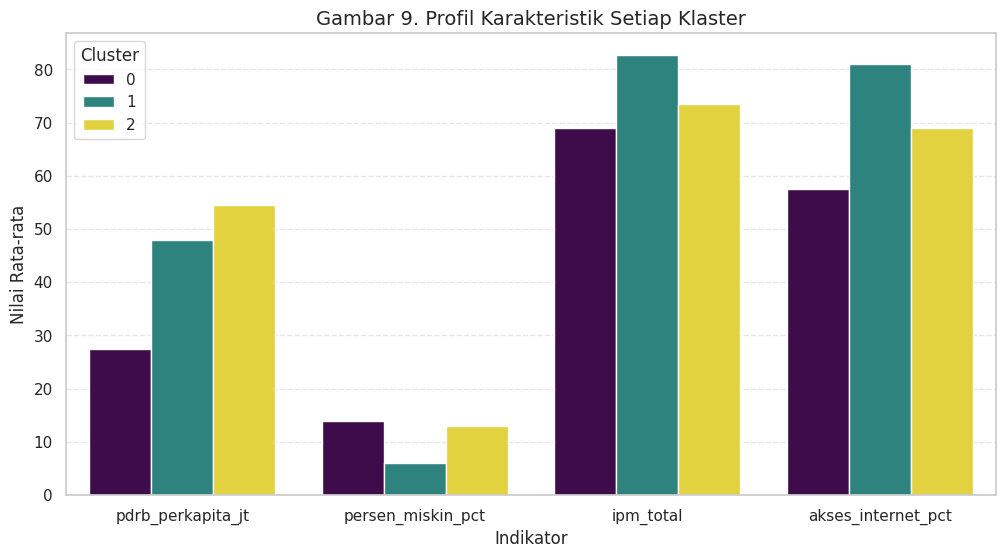

--- ANGGOTA KLASTER ---
Klaster 0: Buton, Muna, Konawe Selatan, Bombana, Wakatobi, Buton Utara, Kolaka Timur, Konawe Kepulauan, Muna Barat, Buton Tengah, Buton Selatan
Klaster 1: Kendari, Baubau
Klaster 2: Konawe, Kolaka, Kolaka Utara, Konawe Utara


In [ ]:
# --- 6. VISUALISASI PROFIL (BAR CHART) ---
# Membandingkan karakteristik antar klaster
plt.figure(figsize=(12, 6))
df_melted = pd.melt(cluster_profile, id_vars="Cluster", var_name="Indikator", value_name="Nilai Rata-rata")

sns.barplot(data=df_melted, x="Indikator", y="Nilai Rata-rata", hue="Cluster", palette="viridis")
plt.title("Gambar 9. Profil Karakteristik Setiap Klaster", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Cek Anggota
print("--- ANGGOTA KLASTER ---")
for c in sorted(master_df['Cluster'].unique()):
    members = master_df[master_df['Cluster'] == c]['Kabupaten/Kota'].values
    print(f"Klaster {c}: {', '.join(members)}")

### **Interpretasi Hasil Modeling (Analisis Klaster)**

Berdasarkan hasil algoritma *K-Means Clustering*, terbentuk 3 (tiga) tipologi wilayah dengan karakteristik unik sebagai berikut:

1.  **Klaster 1: Wilayah Maju / Perkotaan (*Developed Region*)**
    * **Anggota:** **Kota Kendari** dan **Kota Baubau**.
    * **Karakteristik:** Merupakan *outlier* positif dengan IPM tertinggi, akses internet di atas 80%, dan tingkat kemiskinan terendah (4-8%).
    * **Analisis:** Wilayah ini berfungsi sebagai pusat pertumbuhan (*growth pole*) dan penyedia layanan jasa/perdagangan utama di Sulawesi Tenggara. Kesejahteraan masyarakat relatif merata.

2.  **Klaster 2: Wilayah Transisi / Industri (*Developing Region*)**
    * **Anggota:** **Kolaka**, **Konawe**, **Kolaka Utara**, dan **Konawe Utara**.
    * **Karakteristik:** Memiliki PDRB per kapita yang tinggi (40-80 juta rupiah) didorong oleh sektor pertambangan/industri, namun angka kemiskinan masih di level menengah (11-14%).
    * **Analisis:** Terdapat indikasi ketimpangan internal. Meskipun ekonomi makro tumbuh pesat (kekayaan daerah tinggi), manfaatnya belum sepenuhnya menetes (*trickle down*) untuk menurunkan kemiskinan secepat wilayah kota.

3.  **Klaster 0: Wilayah Tertinggal (*Underdeveloped Region*)**
    * **Anggota:** Didominasi wilayah kepulauan dan kabupaten pemekaran (seperti **Buton Raya**, **Muna Raya**, **Wakatobi**, **Bombana**, **Konawe Kepulauan**, **Kolaka Timur**).
    * **Karakteristik:** PDRB rendah (15-30 juta), IPM rendah, dan persentase penduduk miskin tertinggi (13-16%).
    * **Implikasi Kebijakan:** Klaster ini adalah prioritas utama penanganan SDGs 10. Diperlukan intervensi afirmatif pada infrastruktur dasar (internet/jalan) dan penguatan modal manusia (pendidikan) untuk mengejar ketertinggalan dari Klaster 1 dan 2.

**Kesimpulan Akhir:**
Analisis *Clustering* membuktikan adanya pola ketimpangan spasial yang nyata antara wilayah **Daratan (Sentra Tambang)**, **Perkotaan (Jasa)**, dan **Kepulauan (Agraris/Nelayan)**. Kebijakan pembangunan tidak dapat disamaratakan, melainkan harus disesuaikan dengan kebutuhan spesifik tiap klaster.

# **Kesimpulan dan Rekomendasi**

Berdasarkan hasil analisis data menggunakan metode statistik deskriptif, visualisasi, dan *machine learning*, berikut adalah kesimpulan yang menjawab 5 (lima) rumusan masalah penelitian:

### **1. Jawaban Rumusan Masalah**

**1. Bagaimana tingkat ketimpangan pembangunan antar kabupaten/kota?**
Tingkat ketimpangan pembangunan di Sulawesi Tenggara bersifat **multidimensi dan asimetris**. Terjadi pemusatan pembangunan yang ekstrem di wilayah perkotaan (Kota Kendari dan Baubau) yang memiliki skor indeks gabungan tertinggi. Sebaliknya, wilayah kepulauan dan pemekaran baru (seperti Buton Tengah dan Muna Barat) tertinggal jauh dalam aspek ekonomi, sosial, dan infrastruktur.

**2. Bagaimana pengaruh akses layanan publik terhadap kesejahteraan?**
Akses **Internet** memiliki pengaruh paling signifikan terhadap penurunan kemiskinan (korelasi **-0.78**). Wilayah dengan akses internet tinggi cenderung memiliki tingkat kemiskinan rendah. Sementara itu, rasio elektrifikasi (listrik) tidak lagi menjadi faktor pembeda utama karena aksesnya sudah merata di seluruh wilayah.

**3. Bagaimana hubungan tingkat kemiskinan, pengeluaran, dan PDRB?**
Terdapat fenomena **paradoks pertumbuhan** di wilayah sentra tambang (Kolaka, Konawe, Konawe Utara). Wilayah ini memiliki PDRB per kapita sangat tinggi, namun tingkat kemiskinan dan daya beli masyarakatnya belum sebaik wilayah perkotaan. Hal ini membuktikan bahwa PDRB tinggi tidak otomatis menjamin kesejahteraan masyarakat jika tidak diikuti distribusi pendapatan yang merata.

**4. Bagaimana disparitas pendidikan dan gender mempengaruhi ketimpangan?**
Disparitas modal manusia menjadi akar utama ketimpangan wilayah tertinggal.
* **Pendidikan:** Rata-rata lama sekolah di wilayah kepulauan masih di bawah 9 tahun (belum lulus SMP).
* **Gender:** Terdapat kesenjangan (gap) IPM yang ekstrem antara laki-laki dan perempuan di wilayah Buton Raya (selisih hingga 19 poin), yang menghambat produktivitas ekonomi keluarga.

**5. Bagaimana pola pengelompokan (clustering) wilayah berdasarkan indikator SDGs 10?**
Menggunakan algoritma *K-Means Clustering* ($k=3$), wilayah di Sulawesi Tenggara terbagi menjadi 3 tipologi karakteristik:
* **Klaster 1 (Maju/Jasa):** Kota Kendari & Baubau (Kesejahteraan tinggi, IPM tinggi).
* **Klaster 2 (Transisi/Industri):** Kolaka & Konawe Raya (PDRB tinggi, Kemiskinan menengah).
* **Klaster 3 (Tertinggal):** Wilayah Kepulauan & Pemekaran (PDRB rendah, Kemiskinan tinggi, IPM rendah).

---

### **2. Rekomendasi Kebijakan Berbasis Klaster (Data-Driven Policy)**

Untuk mengentaskan ketimpangan (SDGs 10), kebijakan "Satu Ukuran untuk Semua" (*One Size Fits All*) tidak lagi relevan. Pemerintah Provinsi disarankan menerapkan strategi diferensiasi berdasarkan hasil klastering:

#### **A. Untuk Klaster Tertinggal (Wilayah Kepulauan & Pemekaran Baru)**
* *Lokus: Buton Tengah, Buton Selatan, Muna Barat, Konawe Kepulauan, dll.*
* **Strategi: Intervensi Afirmatif & Konektivitas.**
    1.  **Prioritas Infrastruktur Digital:** Mengingat korelasi kuat internet vs kemiskinan, percepatan pembangunan BTS dan jaringan 4G/5G di wilayah *blank spot* kepulauan adalah investasi paling efektif untuk membuka isolasi ekonomi.
    2.  **Beasiswa & Vokasi Perempuan:** Mengatasi gap gender IPM yang ekstrem (hingga 19 poin) dengan program beasiswa khusus perempuan dan pelatihan vokasi berbasis potensi lokal (kelautan/pariwisata).
    3.  **Wajib Belajar 12 Tahun:** Penegakan kebijakan pendidikan dasar yang ketat karena rata-rata lama sekolah masih di bawah jenjang SMP.

#### **B. Untuk Klaster Transisi/Industri (Wilayah Sentra Tambang)**
* *Lokus: Kolaka, Konawe, Kolaka Utara, Konawe Utara.*
* **Strategi: Pemerataan & Hilirisasi Inklusif.**
    1.  **Link and Match Tenaga Kerja:** Memastikan industri smelter menyerap tenaga kerja lokal untuk meningkatkan daya beli masyarakat sekitar (menggeser kurva kemiskinan).
    2.  **Diversifikasi Ekonomi:** Menggunakan Dana Bagi Hasil (DBH) SDA untuk mengembangkan sektor pertanian dan UMKM, agar ekonomi daerah tidak "terperangkap" hanya pada sektor tambang yang padat modal.

#### **C. Untuk Klaster Maju (Pusat Pertumbuhan)**
* *Lokus: Kota Kendari & Kota Baubau.*
* **Strategi: Penguatan Sektor Jasa & Hub Inovasi.**
    1.  **Smart City & Digital Hub:** Mengembangkan ekosistem ekonomi digital untuk menampung tenaga kerja terdidik.
    2.  **Peran sebagai Lokomotif:** Memperkuat konektivitas logistik pelabuhan agar dapat menjadi pintu gerbang ekspor bagi komoditas dari wilayah kabupaten di sekitarnya.

---
**Penutup:**
Pencapaian SDGs 10 di Sulawesi Tenggara hanya dapat terwujud jika fokus pembangunan digeser dari sekadar mengejar angka pertumbuhan PDRB makro menjadi penguatan **Akses Digital** dan **Kualitas Modal Manusia**, khususnya di wilayah kepulauan yang selama ini tertinggal.